In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [45]:
# Configurar Matplotlib para usar "Times New Roman"
plt.rcParams['font.family'] = 'Times New Roman'
plt.rc('text', usetex=False) # Configurar Matplotlib para no usar LaTeX
plt.rc('mathtext', fontset='stix')  # Configurar Matplotlib para usar "Times New Roman" en las fórmulas matemáticas

#**1 - Definición del Problema**

Contexto:

El Spaceship Titanic sufrió una anomalía espacio-temporal durante su viaje, lo que resultó en que casi la mitad de los pasajeros fueran transportados a una dimensión alternativa. Nuestro objetivo es predecir qué pasajeros fueron transportados utilizando las características disponibles en el conjunto de datos.

##**Objetivo del Proyecto**

Desarrollar un modelo predictivo que determine si un pasajero fue transportado a una dimensión alternativa, basándose en sus datos personales y el contexto del viaje.



##**Impacto de la Solución**

Un modelo preciso podría:

1.   Ayudar a identificar patrones asociados con los pasajeros transportados.
2.   Brindar insights para mejorar la seguridad y eficiencia en futuros viajes intergalácticos.




In [46]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**2 - Estadistica Descriptiva**

In [47]:
#PARTE 2 Estadistica Descriptiva
# Importar librerías necesarias
import pandas as pd

# Cargar los datos originales
train_data = pd.read_csv('drive/MyDrive/NaveEspacialTitanic/train.csv')
display(train_data.head())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [48]:
# Estadística descriptiva general
print("Estadística descriptiva general:")
display(train_data.describe(include='all'))


Estadística descriptiva general:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [49]:
# Estadística específica para variables numéricas
print("\nEstadística para variables numéricas:")
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
display(train_data[numerical_columns].describe())


Estadística para variables numéricas:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [50]:
# Frecuencias para variables categóricas
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'Cabin', 'VIP', 'Name']
for col in categorical_columns:
    print(f"\nFrecuencias de la columna {col}:")
    display(train_data[col].value_counts())


Frecuencias de la columna HomePlanet:


,count
HomePlanet,
Earth,4602
Europa,2131
Mars,1759



Frecuencias de la columna CryoSleep:


,count
CryoSleep,
False,5439
True,3037



Frecuencias de la columna Destination:


,count
Destination,
TRAPPIST-1e,5915
55 Cancri e,1800
PSO J318.5-22,796



Frecuencias de la columna Cabin:


,count
Cabin,
G/734/S,8
G/109/P,7
B/201/P,7
G/1368/P,7
G/981/S,7
...,...
G/556/P,1
E/231/S,1
G/545/S,1



Frecuencias de la columna VIP:


,count
VIP,
False,8291
True,199



Frecuencias de la columna Name:


,count
Name,
Gollux Reedall,2
Elaney Webstephrey,2
Grake Porki,2
Sus Coolez,2
Apix Wala,2
...,...
Jamela Griffy,1
Hardy Griffy,1
Salley Mckinn,1


In [51]:
# Identificación de valores faltantes
print("\nValores faltantes por columna:")
display(train_data.isnull().sum())


Valores faltantes por columna:


,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [52]:
# Identificación de posibles valores atípicos en columnas numéricas
print("\nPosibles valores atípicos en gastos:")
for col in numerical_columns:
    print(f"Columna {col}:")
    print(f"  Máximo: {train_data[col].max()}")
    print(f"  75% Cuartil: {train_data[col].quantile(0.75)}")


Posibles valores atípicos en gastos:
Columna Age:
  Máximo: 79.0
  75% Cuartil: 38.0
Columna RoomService:
  Máximo: 14327.0
  75% Cuartil: 47.0
Columna FoodCourt:
  Máximo: 29813.0
  75% Cuartil: 76.0
Columna ShoppingMall:
  Máximo: 23492.0
  75% Cuartil: 27.0
Columna Spa:
  Máximo: 22408.0
  75% Cuartil: 59.0
Columna VRDeck:
  Máximo: 24133.0
  75% Cuartil: 46.0


**Análisis de la Estadística Descriptiva**

1.   Variables Numéricas
* Las edades de los pasajeros varían de 0 a 79 años, con una media de 28.83 años y una mediana de 27 años, lo que sugiere una distribución ligeramente sesgada hacia edades más jóvenes.

*  Los gastos en diferentes servicios (RoomService, FoodCourt, ShoppingMall, Spa y VRDeck) presentan valores máximos inusualmente altos, lo que indica la presencia de posibles valores atípicos. Por ejemplo, el gasto máximo en Spa es 22,408 unidades, mientras que el tercer cuartil (75%) es solo 59 unidades.

* Los valores atípicos en gastos son evidentes en todas las categorías, ya que los valores máximos superan significativamente los cuartiles superiores (Q3), indicando que una minoría de pasajeros tiene un gasto desproporcionadamente alto.

2.   Variables Categóricas

* Planeta de Origen (HomePlanet):
 *  Earth es el planeta más común (4602), seguido por Europa (2131) y Mars (1759).
* Estado de Criogenia (CryoSleep):
 * Un 64% de los pasajeros no se encontraba en criogenización (5,439), mientras que un 36% sí lo estaba (3,037).
* Destino (Destination):
 * El principal destino de los pasajeros fue TRAPPIST-1e (5,915), seguido de 55 Cancri e (1,800) y PSO J318.5-22 (796).
* Cabina (Cabin):
 * Hay una alta diversidad de cabinas (6,560 únicas), lo que sugiere que no existen tendencias claras en las asignaciones de cabinas.
* Estado VIP (VIP):
 * La mayoría de los pasajeros no son VIP (96.5% False).
3.   Valores Faltantes

* Hay valores faltantes en varias columnas clave:
 * Age, HomePlanet, CryoSleep, Cabin, Destination, y VIP tienen entre un 2% y un 2.5% de datos faltantes.
 * Los valores faltantes son manejables y pueden imputarse sin afectar significativamente el análisis.

4.   Posibles Valores Atipicos

* Varias columnas contienen valores faltantes, especialmente en las categorías HomePlanet, CryoSleep, Cabin, y Age, con entre 179 y 217 datos faltantes en cada una.
* Las columnas relacionadas con gastos (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck) también tienen valores faltantes (aproximadamente 180-200 datos), lo cual puede requerir imputación para un análisis más completo.



#**3 - Visualizacion Descriptiva**

## Visualización Distribución Variables Numericas

<Figure size 1000x600 with 0 Axes>

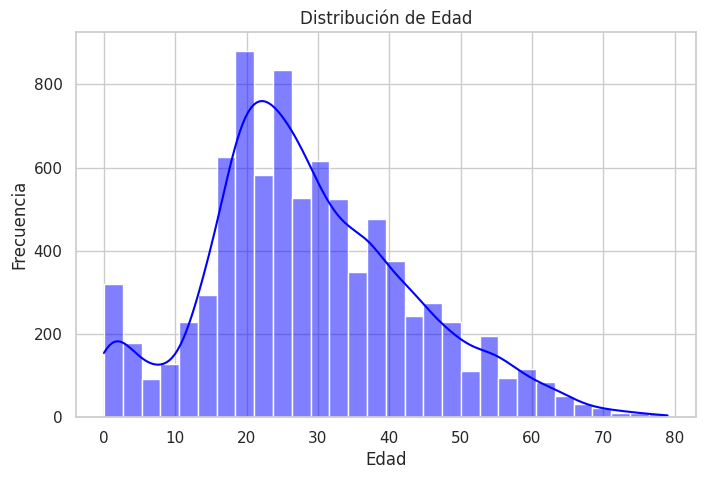

In [53]:
# Parte 3 Visualizacion Descriptiva

# Cargar los datos originales
train_data = pd.read_csv('drive/MyDrive/NaveEspacialTitanic/train.csv')

# Configuración general para los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# 1. Distribución de Age
plt.figure(figsize=(8, 5))
sns.histplot(data=train_data, x='Age', kde=True, bins=30, color='blue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


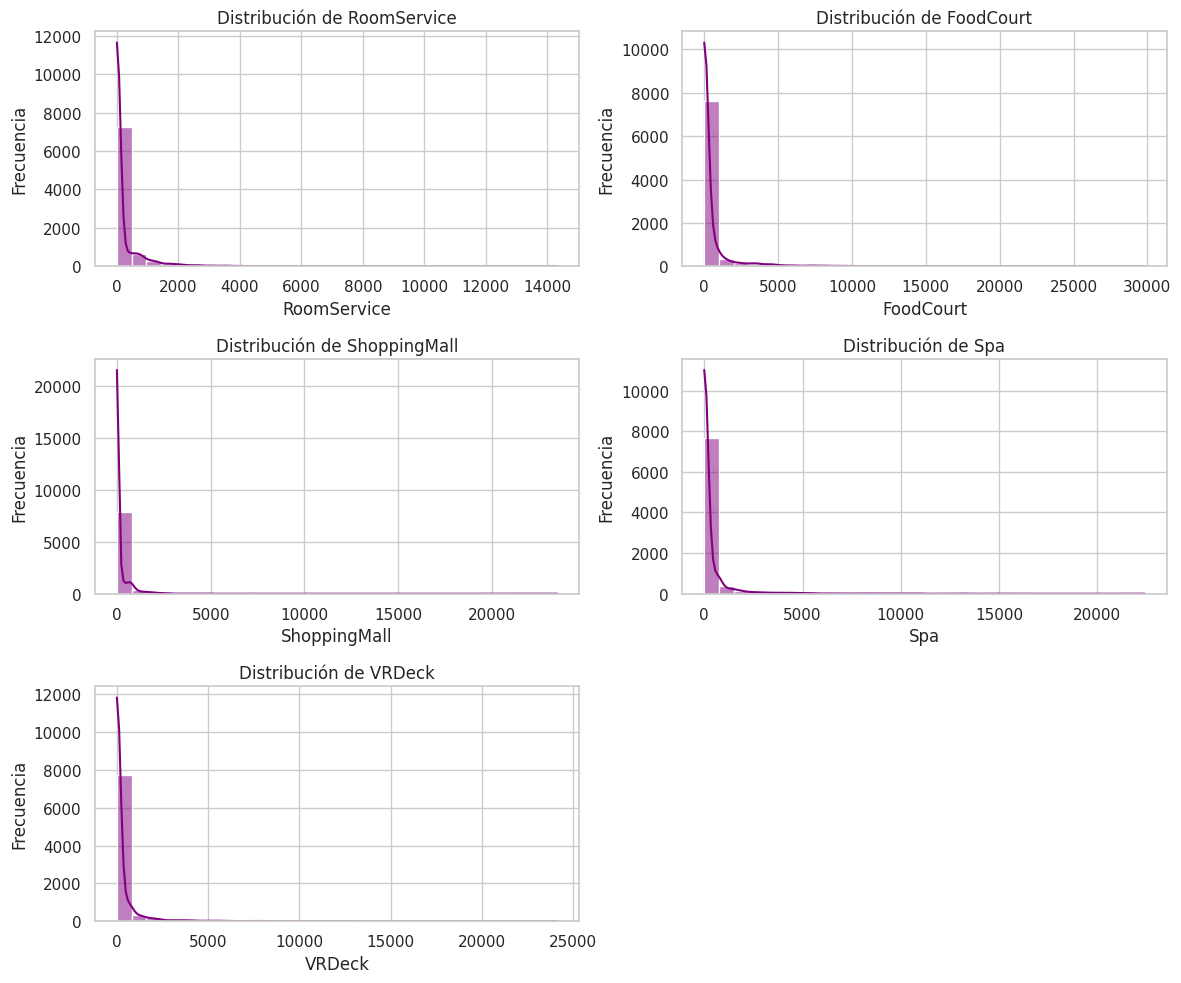

In [54]:
# Columnas a graficar
gastos_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Configuración del subgráfico
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 filas, 2 columnas
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Iterar sobre las columnas y los ejes
for i, col in enumerate(gastos_columns):
    sns.histplot(data=train_data, x=col, kde=True, bins=30, color='purple', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Eliminar cualquier gráfico vacío si hay menos gráficos que celdas
for j in range(len(gastos_columns), len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño
plt.tight_layout()
plt.show()

## Visualización Distribución Variables Categóricas

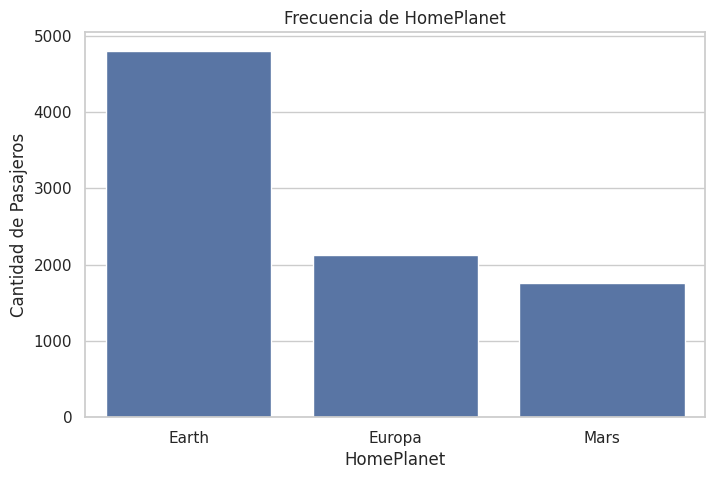

In [177]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='HomePlanet', order=train_data['HomePlanet'].value_counts().index)
plt.title('Frecuencia de HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Cantidad de Pasajeros')
plt.show()

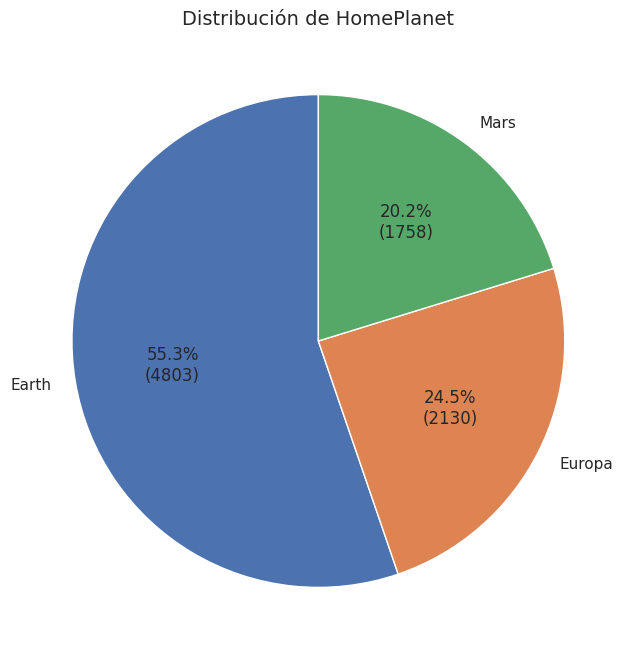

In [188]:
# Crear un gráfico de torta para la columna 'HomePlanet'
plt.figure(figsize=(8, 8))
train_data['HomePlanet'].value_counts().plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p * train_data["HomePlanet"].notnull().sum() / 100)})',  # Mostrar porcentaje y cantidad
    startangle=90,  # Rotar el gráfico para comenzar desde arriba
    legend=False  # Ocultar leyenda si no es necesaria
)

# Personalizar título
plt.title('Distribución de HomePlanet', fontsize=14)
plt.ylabel('')  # Eliminar etiqueta del eje Y
plt.show()



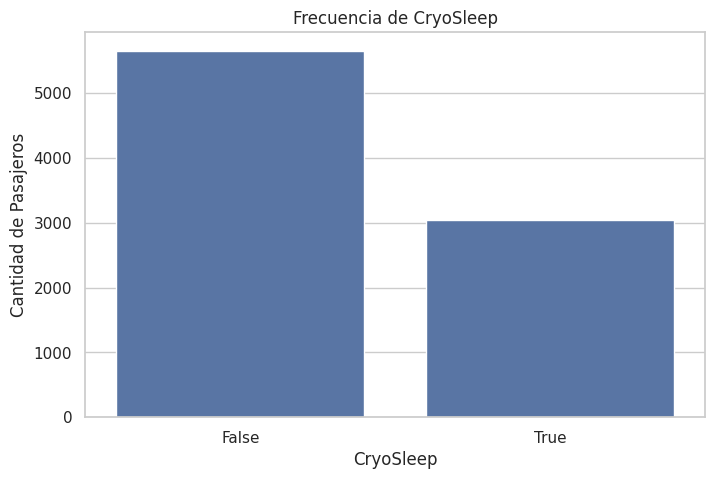

In [178]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='CryoSleep')
plt.title('Frecuencia de CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Cantidad de Pasajeros')
plt.show()

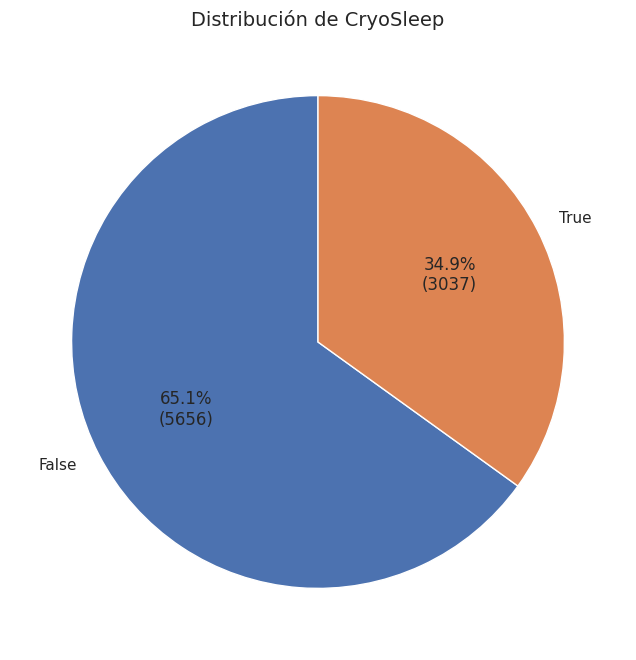

In [189]:
# Crear un gráfico de torta para la columna 'CryoSleep'
plt.figure(figsize=(8, 8))
train_data['CryoSleep'].value_counts().plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p * train_data["CryoSleep"].notnull().sum() / 100)})',  # Mostrar porcentaje y cantidad
    startangle=90,  # Rotar el gráfico para comenzar desde arriba
    legend=False  # Ocultar leyenda si no es necesaria
)

# Personalizar título
plt.title('Distribución de CryoSleep', fontsize=14)
plt.ylabel('')  # Eliminar etiqueta del eje Y
plt.show()



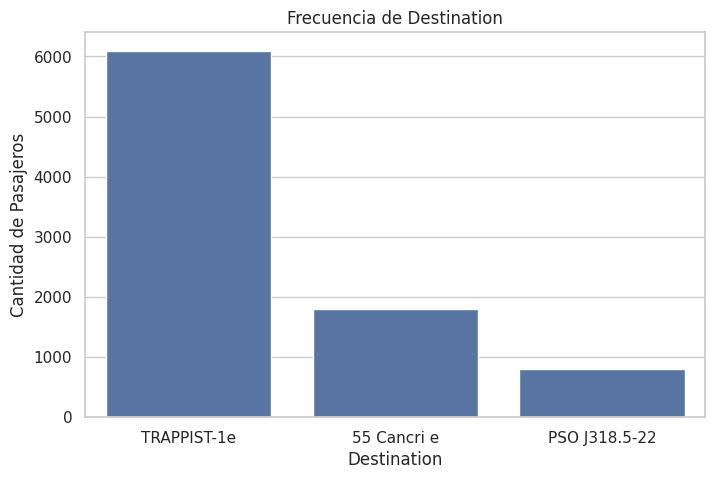

In [180]:

plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Destination', order=train_data['Destination'].value_counts().index)
plt.title('Frecuencia de Destination')
plt.xlabel('Destination')
plt.ylabel('Cantidad de Pasajeros')
plt.show()

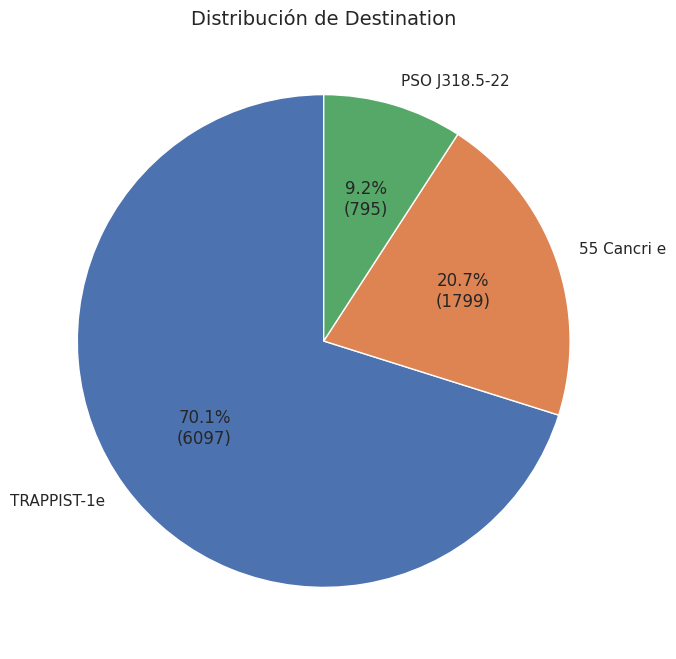

In [190]:
# Crear un gráfico de torta para la columna 'Destination'
plt.figure(figsize=(8, 8))
train_data['Destination'].value_counts().plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p * train_data["Destination"].notnull().sum() / 100)})',  # Mostrar porcentaje y cantidad
    startangle=90,  # Rotar el gráfico para comenzar desde arriba
    legend=False  # Ocultar leyenda si no es necesaria
)

# Personalizar título
plt.title('Distribución de Destination', fontsize=14)
plt.ylabel('')  # Eliminar etiqueta del eje Y
plt.show()



<ipython-input-58-3a697306e69b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='VIP', palette='pastel')


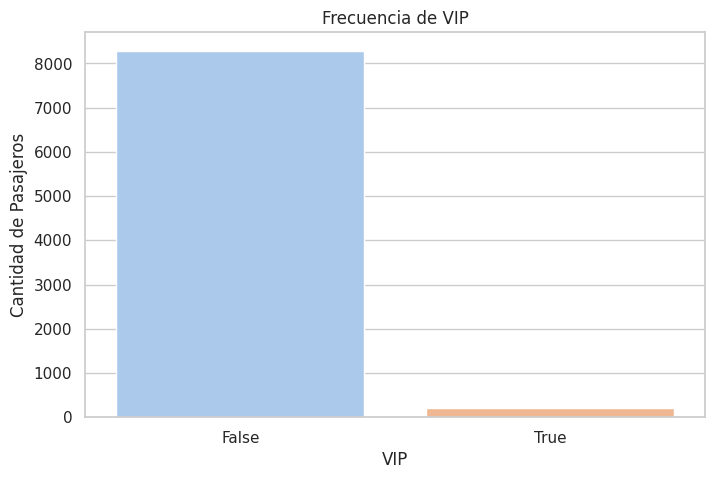

In [58]:
# Frecuencia de Destination
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='VIP', palette='pastel')
plt.title('Frecuencia de VIP')
plt.xlabel('VIP')
plt.ylabel('Cantidad de Pasajeros')
plt.show()

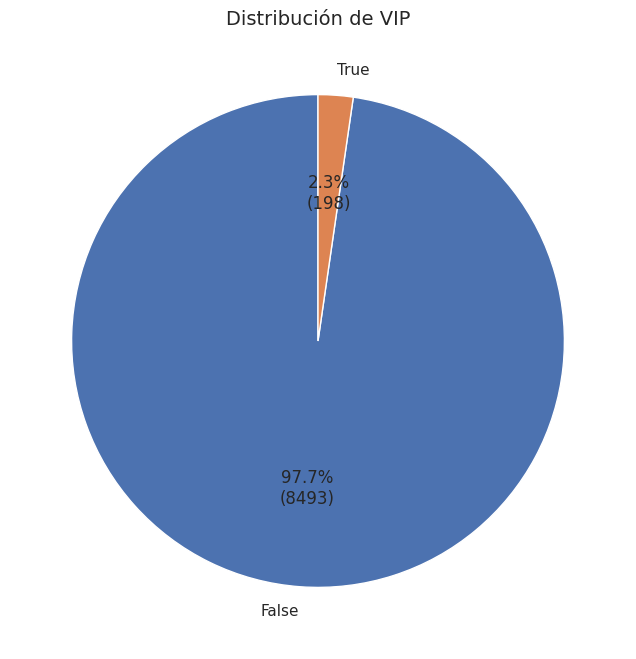

In [192]:
# Crear un gráfico de torta para la columna 'VIP'
plt.figure(figsize=(8, 8))
train_data['VIP'].value_counts().plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p * train_data["VIP"].notnull().sum() / 100)})',  # Mostrar porcentaje y cantidad
    startangle=90,  # Rotar el gráfico para comenzar desde arriba
    legend=False  # Ocultar leyenda si no es necesaria
)

# Personalizar título
plt.title('Distribución de VIP', fontsize=14)
plt.ylabel('')  # Eliminar etiqueta del eje Y
plt.show()



## Visualización Categorías Combinadas

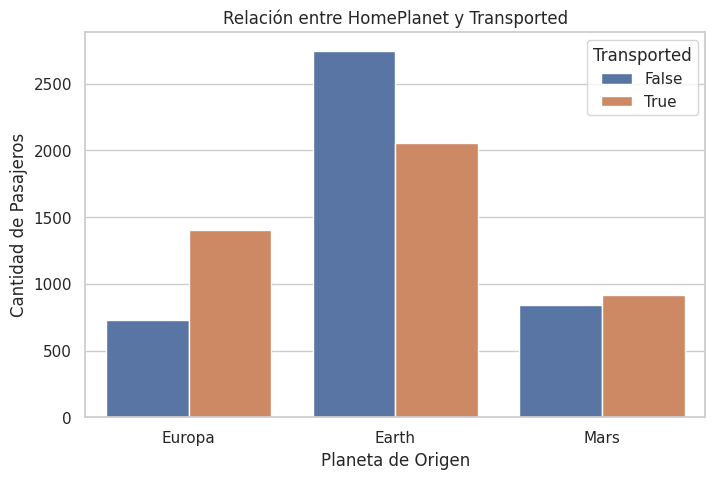

In [186]:
# Relación entre HomePlanet y Transported
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='HomePlanet', hue='Transported')
plt.title('Relación entre HomePlanet y Transported')
plt.xlabel('Planeta de Origen')
plt.ylabel('Cantidad de Pasajeros')
plt.show()


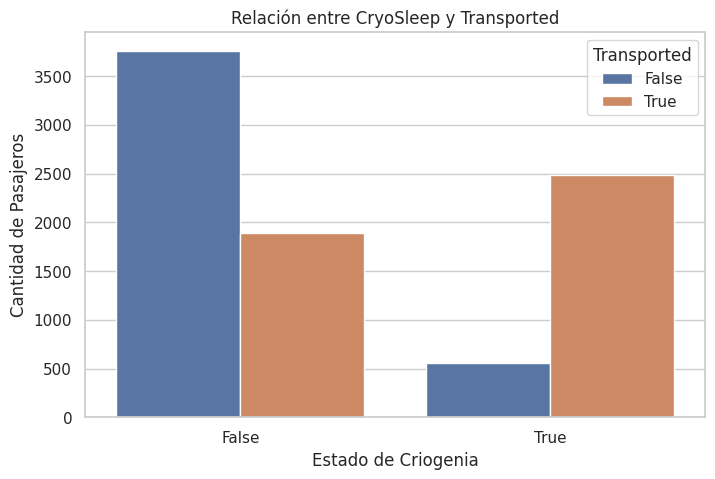

In [183]:

#  Relación entre CryoSleep y Transported
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='CryoSleep', hue='Transported')
plt.title('Relación entre CryoSleep y Transported')
plt.xlabel('Estado de Criogenia')
plt.ylabel('Cantidad de Pasajeros')
plt.show()



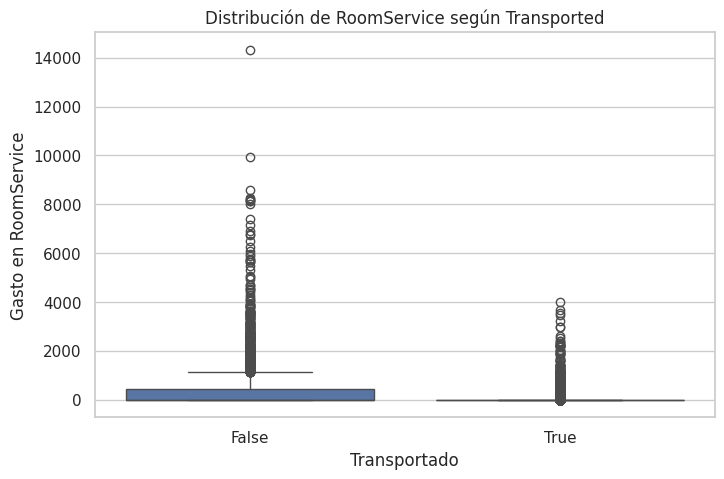

In [185]:
# Distribución de RoomService según Transported
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_data, x='Transported', y='RoomService')
plt.title('Distribución de RoomService según Transported')
plt.xlabel('Transportado')
plt.ylabel('Gasto en RoomService')
plt.show()




**Visualización Descriptiva: Resumen de Hallazgos**

En las variables numéricas, se observó que la distribución de la edad de los pasajeros se concentra entre los 20 y 40 años, con un peak en torno a los 30 años. La distribución es asimétrica hacia la derecha, con pocos pasajeros mayores de 60 años. En cuanto a los gastos en servicios como RoomService, FoodCourt, ShoppingMall, Spa y VRDeck, la mayoría de los pasajeros reporta poco o ningún gasto, con distribuciones altamente sesgadas hacia la derecha y presencia de valores atípicos que representan gastos significativamente altos.

Respecto a las variables categóricas, los pasajeros provienen mayoritariamente de "Earth", seguidos por "Europa" y luego "Mars". En cuanto al estado de criogenia (CryoSleep), un mayor número de pasajeros no utiliza este estado, aunque la diferencia no es abrumadora. Los destinos más populares son "TRAPPIST-1e", seguido de "55 Cancri e" y "PSO J318.5-22", reflejando posiblemente una mayor demanda o accesibilidad a ciertos destinos. Por otro lado, solo una pequeña proporción de los pasajeros son VIP, lo que indica que la mayoría pertenece a clientes regulares.

En las relaciones combinadas, los pasajeros de "Europa" tienen una mayor probabilidad de ser transportados en comparación con aquellos de "Earth" y "Mars", lo que sugiere una relación potencial entre el planeta de origen y el transporte exitoso. Asimismo, los pasajeros en estado de criogenia tienen más probabilidades de ser transportados, lo que podría indicar un impacto positivo de este estado en el resultado del transporte. Finalmente, el gasto en RoomService es generalmente bajo para ambos grupos (transportados y no transportados), pero los valores atípicos son más pronunciados en los pasajeros que no fueron transportados.

# **4- Preprocesamiento de Datos**

In [62]:
# Revisar valores faltantes
print("Valores faltantes por columna:")
print(train_data.isnull().sum())

Valores faltantes por columna:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [64]:
train_data = pd.read_csv('drive/MyDrive/NaveEspacialTitanic/train.csv')
display(train_data.head())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [65]:
# Manejo de valores faltantes para columnas numéricas
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['RoomService'] = train_data['RoomService'].fillna(0)
train_data['FoodCourt'] = train_data['FoodCourt'].fillna(0)
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(0)
train_data['Spa'] = train_data['Spa'].fillna(0)
train_data['VRDeck'] = train_data['VRDeck'].fillna(0)

# Manejo de valores faltantes para columnas categóricas
train_data['HomePlanet'] = train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0])
train_data['Destination'] = train_data['Destination'].fillna(train_data['Destination'].mode()[0])
train_data['VIP'] = train_data['VIP'].fillna(train_data['VIP'].mode()[0])

# Manejo de valores faltantes para Cabin
if 'Cabin' in train_data.columns:
    train_data['Deck'] = train_data['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else 'Unknown')
    train_data['Num'] = train_data['Cabin'].apply(lambda x: int(x.split('/')[1]) if pd.notnull(x) else -1)
    train_data['Side'] = train_data['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else 'Unknown')
    train_data.drop('Cabin', axis=1, inplace=True)  # Eliminar columna original Cabin


display(train_data.head())

<ipython-input-65-8f9a0a965664>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['CryoSleep'] = train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0])
<ipython-input-65-8f9a0a965664>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['VIP'] = train_data['VIP'].fillna(train_data['VIP'].mode()[0])


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


<ipython-input-197-5730b0a34b2e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Deck', palette='pastel', order=train_data['Deck'].value_counts().index)


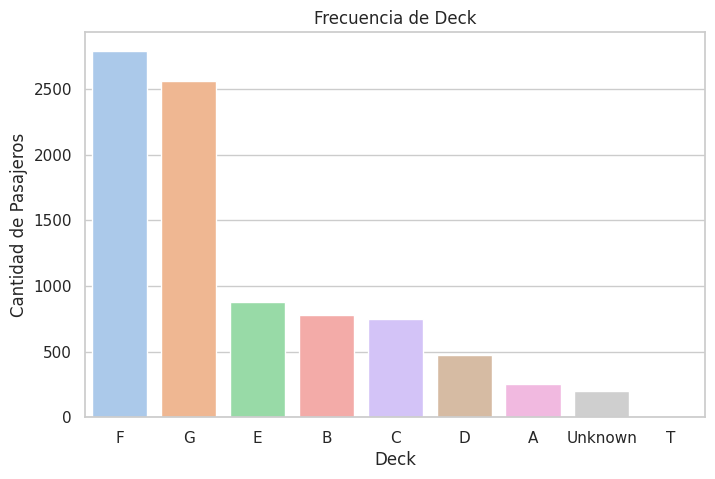

In [197]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Deck', palette='pastel', order=train_data['Deck'].value_counts().index)
plt.title('Frecuencia de Deck')
plt.xlabel('Deck')
plt.ylabel('Cantidad de Pasajeros')
plt.show()

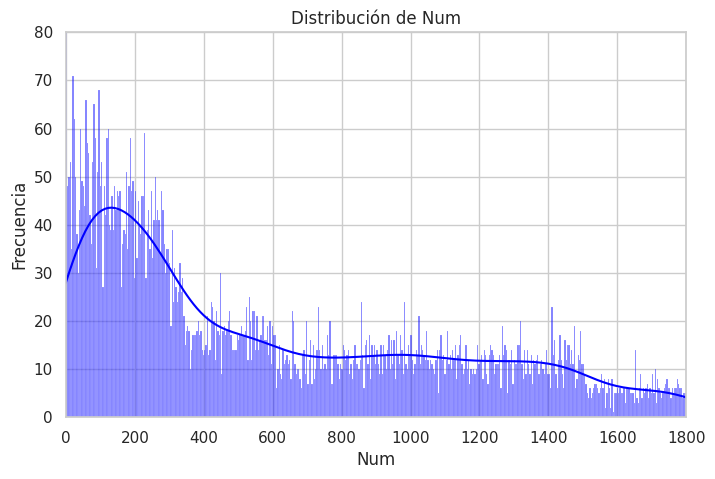

In [67]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_data, x='Num', kde=True, bins=500, color='blue')
plt.title('Distribución de Num')
plt.xlabel('Num')
plt.xlim(0,1800)
plt.ylim(0,80)
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-68-c015ab32b319>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Side', palette='pastel', order=train_data['Side'].value_counts().index)


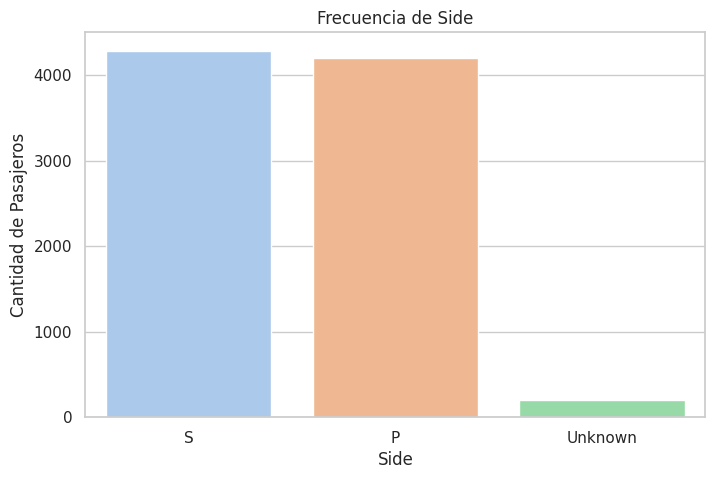

In [68]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Side', palette='pastel', order=train_data['Side'].value_counts().index)
plt.title('Frecuencia de Side')
plt.xlabel('Side')
plt.ylabel('Cantidad de Pasajeros')
plt.show()

In [69]:
display(train_data.describe(include='all'))

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
count,8693,8693,8693,8693,8693.000000,8693,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8493,8693,8693,8693.000000,8693
unique,8693,3,2,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2,9,NaN,3
top,0001_01,Earth,False,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True,F,NaN,S
freq,1,4803,5656,6097,NaN,8494,NaN,NaN,NaN,NaN,NaN,2,4378,2794,NaN,4288
mean,NaN,NaN,NaN,NaN,28.790291,NaN,220.009318,448.434027,169.572300,304.588865,298.261820,NaN,NaN,NaN,586.601173,NaN
std,NaN,NaN,NaN,NaN,14.341404,NaN,660.519050,1595.790627,598.007164,1125.562559,1134.126417,NaN,NaN,NaN,513.906241,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,-1.000000,NaN
25%,NaN,NaN,NaN,NaN,20.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,152.000000,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,407.000000,NaN
75%,NaN,NaN,NaN,NaN,37.000000,NaN,41.000000,61.000000,22.000000,53.000000,40.000000,NaN,NaN,NaN,983.000000,NaN


In [70]:
# Manejo de valores faltantes para Name
if 'Name' in train_data.columns:
    train_data['Surname'] = train_data['Name'].apply(lambda x: x.split()[1] if pd.notnull(x) else 'Unknown')
    train_data.drop('Name', axis=1, inplace=True)  # Eliminar columna original Name

In [71]:
display(train_data.describe(include='all'))

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Surname
count,8693,8693,8693,8693,8693.000000,8693,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693,8693,8693.000000,8693,8693
unique,8693,3,2,3,NaN,2,NaN,NaN,NaN,NaN,NaN,2,9,NaN,3,2218
top,0001_01,Earth,False,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,True,F,NaN,S,Unknown
freq,1,4803,5656,6097,NaN,8494,NaN,NaN,NaN,NaN,NaN,4378,2794,NaN,4288,200
mean,NaN,NaN,NaN,NaN,28.790291,NaN,220.009318,448.434027,169.572300,304.588865,298.261820,NaN,NaN,586.601173,NaN,NaN
std,NaN,NaN,NaN,NaN,14.341404,NaN,660.519050,1595.790627,598.007164,1125.562559,1134.126417,NaN,NaN,513.906241,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,20.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,152.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,407.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,37.000000,NaN,41.000000,61.000000,22.000000,53.000000,40.000000,NaN,NaN,983.000000,NaN,NaN


In [195]:
# Comprobar si aún quedan valores faltantes
print("\nValores faltantes después del preprocesamiento")
print(train_data.isnull().sum())

# Guardar los datos preprocesados en la misma carpeta de Google Drive
train_data.to_csv('drive/MyDrive/NaveEspacialTitanic/train_preprocessed.csv', index=False)

print("\nPreprocesamiento inicial completado. Los datos preprocesados se guardaron como 'train_preprocessed.csv' en Google Drive.")



Valores faltantes después del preprocesamiento
PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
Surname         0
dtype: int64

Preprocesamiento inicial completado. Los datos preprocesados se guardaron como 'train_preprocessed.csv' en Google Drive.


**Resumen del Preprocesamiento**


El preprocesamiento de datos es una etapa clave en cualquier proyecto de Machine Learning, ya que garantiza que los datos estén limpios, completos y listos para el modelado. En este caso, los pasos realizados fueron:

1. Identificación de Valores Faltantes

 *  Se evaluaron las columnas del conjunto de datos para determinar la cantidad de valores faltantes. Las variables como HomePlanet, CryoSleep, Cabin, Destination y Age mostraron una proporción significativa de valores nulos que requerían tratamiento.

2. Imputación de Valores Faltantes:

 Se manejaron los valores faltantes dependiendo del tipo de datos:

 * Para las variables numéricas (Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck), se utilizaron estrategias de imputación como la media, la mediana, o el valor cero, dependiendo del contexto de la variable.
 * Las variables categóricas como HomePlanet, CryoSleep, Destination, y VIP fueron imputadas con su moda.

3. Transformacion de columnas

* Cabin:

 * La columna Cabin fue procesada para extraer el deck (primera letra de la cabina), que representa el piso o nivel en que se encuentra la cabina.
 * La columna Cabin fue procesada para extraer el num (segunda parte de la cabina), representa el numero de la cabina dentro del piso.
 * La columna Cabin fue procesada para extraer el side (ultima letra de la cabina), representa el lado o orientación de la cabina.
 * Los valores faltantes en Cabin se reemplazaron con 'Unknown' en la nueva columna Deck, Side y -1 en Num, luego Cabin fue eliminada.

* Name:
 * De Name, extraímos el apellido de cada pasajero para conservar información útil de agrupación familiar.
 * Los valores faltantes fueron imputados con 'Unknown', y la columna original Name fue eliminada.

4. Validación del Preprocesamiento

 * Se verificó que todas las columnas relevantes ya no tuvieran valores faltantes.


## Codificación Variables Categoricas

In [73]:
from sklearn.preprocessing import LabelEncoder

# Copiar dataset para trabajar
encoded_data = train_data.copy()

# Codificar `HomePlanet`, `Destination` y `Deck` usando One-Hot Encoding
one_hot_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']
encoded_data = pd.get_dummies(encoded_data, columns=one_hot_cols, drop_first=True)

# Codificar `CryoSleep` y `VIP` usando Binary Encoding
binary_cols = ['CryoSleep', 'VIP']
for col in binary_cols:
    encoded_data[col] = encoded_data[col].map({False: 0, True: 1})

# Revisar datos codificados
display(encoded_data.head())

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Side_S,Side_Unknown
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,...,True,False,False,False,False,False,False,False,False,False
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,...,False,False,False,False,True,False,False,False,True,False
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,...,False,False,False,False,False,False,False,False,True,False
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,...,False,False,False,False,False,False,False,False,True,False
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,...,False,False,False,False,True,False,False,False,True,False


Análisis previo de las variables categóricas
* HomePlanet (3 categorías):

Codificación recomendada: Label Encoding o One-Hot Encoding.
Con tres categorías, One-Hot Encoding no generará demasiadas columnas adicionales y puede ser útil si las categorías no tienen un orden específico.

* CryoSleep (2 categorías: True y False):

Codificación recomendada: Binary Encoding (convertir a 0 para False y 1 para True).

* Destination (3 categorías):

Codificación recomendada: One-Hot Encoding, ya que no hay un orden implícito entre las categorías.

* VIP (2 categorías: True y False):

Codificación recomendada: Binary Encoding (0 para False, 1 para True).

* Deck (9 categorías + Unknown):

Codificación recomendada: One-Hot Encoding, ya que no hay un orden específico y las categorías son limitadas.

* Side (3 categorías: S, P y Unknown):

Codificación recomendada: One-Hot Encoding o Label Encoding si el modelo puede manejar categorías ordinales.

# **5 - Selección de modelo**

## Modelos


In [74]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam


### 0. División de Datos

In [75]:
# Cargar datos
data = encoded_data.copy()

# Separar características (X) y etiqueta (y)
X = data.drop(['PassengerId', 'Transported', 'Surname'], axis=1)  # Eliminar columnas no relevantes
y = data['Transported'].map({True: 1, False: 0})  # Convertir etiquetas a 1/0

# División en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar datos (opcional para algunos modelos como SVM y Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [76]:
# Diccionario para almacenar resultados y modelos
results = {}
models = {}

# Función para evaluar y guardar modelos
def evaluate_and_save_model(model, X_train, y_train, X_val, y_val, name, scaled=False):
    """
    Entrena, evalúa y guarda un modelo. Almacena la precisión en el diccionario de resultados.
    """
    if scaled:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_val_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_val)

    accuracy = accuracy_score(y_val, preds)
    results[name] = accuracy

    # Guardar el modelo entrenado
    model_filename = f'{name.replace(" ", "_")}_model.pkl'
    joblib.dump(model, model_filename)
    print(f"Modelo {name} guardado como {model_filename}")

    # Almacenar el modelo en el diccionario
    models[name] = model

    return preds

### **1- Modelo Random Forest**


In [77]:
# 1. Modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_preds = evaluate_and_save_model(rf_model, X_train, y_train, X_val, y_val, 'Random Forest')

Modelo Random Forest guardado como Random_Forest_model.pkl


### **2- Modelo Logistic Regression**


In [78]:
# 2. Modelo Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_preds = evaluate_and_save_model(lr_model, X_train, y_train, X_val, y_val, 'Logistic Regression', scaled=True)

Modelo Logistic Regression guardado como Logistic_Regression_model.pkl


### **3- Modelo Support Vector Machine (SVM)**

In [79]:
# 3. Modelo Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_preds = evaluate_and_save_model(svm_model, X_train, y_train, X_val, y_val, 'SVM', scaled=True)

Modelo SVM guardado como SVM_model.pkl


### **4- Modelo XGBoost**

In [80]:
# 4. Modelo XGBoost
xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)
xgb_preds = evaluate_and_save_model(xgb_model, X_train, y_train, X_val, y_val, 'XGBoost')

Modelo XGBoost guardado como XGBoost_model.pkl


### Rusultados Previos

In [81]:
# Mostrar resultados
print("\nResultados de precisión:")
for model, accuracy in results.items():
    print(f'{model}: {accuracy:.4f}')

# Seleccionar el mejor modelo
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Mostrar el reporte de clasificación del mejor modelo
print(f"\nMejor modelo: {best_model_name}")
print(classification_report(y_val, best_model.predict(X_val_scaled if best_model_name in ['Logistic Regression', 'SVM'] else X_val)))



Resultados de precisión:
Random Forest: 0.7953
Logistic Regression: 0.7815
SVM: 0.7895
XGBoost: 0.7930

Mejor modelo: Random Forest
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       861
           1       0.81      0.78      0.79       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



### **5- Red Neuronal**

In [123]:
# Importar librerías necesarias
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint

# Crear red neuronal optimizada
nn_model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.02)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.02)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.02)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilar modelo
optimizer = Adam(learning_rate=0.0003)
nn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callback para guardar el mejor modelo basado en val_accuracy
checkpoint_callback = ModelCheckpoint(
    filepath='best_nn_model.keras',  # Cambiar extensión a .keras
    monitor='val_accuracy',          # Métrica para monitorear
    mode='max',                      # Queremos maximizar val_accuracy
    save_best_only=True,             # Guardar solo el mejor modelo
    verbose=1
)

# Entrenamiento del modelo
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=300,
    batch_size=32,
    verbose=1,
    callbacks=[checkpoint_callback]
)


# Cargar el mejor modelo guardado
from tensorflow.keras.models import load_model
nn_model = load_model('best_nn_model.keras')  # Usar la misma extensión al cargar el modelo

# Evaluar el mejor modelo en el conjunto de validación
nn_preds = (nn_model.predict(X_val_scaled) > 0.5).astype(int)  # Cambiar best_nn_model por nn_model
results = {}
results['Neural Network'] = accuracy_score(y_val, nn_preds)

# Mostrar los resultados
print(f"Precisión del modelo en el conjunto de validación: {results['Neural Network']:.4f}")



Epoch 1/300
207/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4913 - loss: 3.3040
Epoch 1: val_accuracy improved from -inf to 0.74353, saving model to best_nn_model.keras
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4930 - loss: 3.2869 - val_accuracy: 0.7435 - val_loss: 2.4065
Epoch 2/300
209/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6295 - loss: 2.2232
Epoch 2: val_accuracy improved from 0.74353 to 0.75561, saving model to best_nn_model.keras
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6303 - loss: 2.2142 - val_accuracy: 0.7556 - val_loss: 1.6390
Epoch 3/300
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7064 - loss: 1.5253
Epoch 3: val_accuracy improved from 0.75561 to 0.76883, saving model to best_nn_model.keras
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7065 - loss: 1.5248 - val_accuracy: 0.7688 - val_loss: 1.1455
Epoch 4/300
199/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7477 - loss: 1.1095
Epoch 4: val_accuracy improv

Grafico Perdida Entrenamiento Red Neuronal

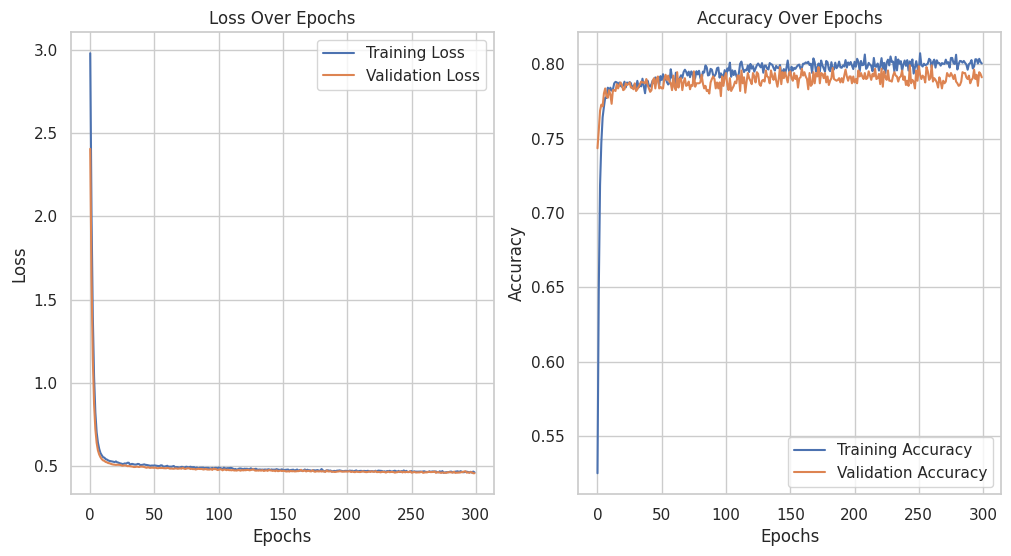

In [124]:
# Graficar pérdida y precisión
plt.figure(figsize=(12, 6))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Resultados Generales

In [125]:
# Mostrar resultados de todos los modelos
print("\nResultados de precisión:")
for model, accuracy in results.items():
    print(f'{model}: {accuracy:.4f}')

# Determinar el mejor modelo
best_model_name = max(results, key=results.get)

if best_model_name == 'Neural Network':
    best_model = nn_model
    best_preds = nn_preds
else:
    # Usar el modelo tradicional
    best_preds = best_model.predict(X_val_scaled if 'scaled' in best_model_name.lower() else X_val)
    if hasattr(best_model, "predict_proba"):
        best_preds = (best_preds > 0.5).astype(int)
    else:
        best_preds = best_preds.astype(int)

# Imprimir el mejor modelo y su reporte de clasificación
print(f"\nMejor modelo: {best_model_name}")
print(classification_report(y_val, best_preds))


Resultados de precisión:
Neural Network: 0.7993

Mejor modelo: Neural Network
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       861
           1       0.80      0.81      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



Visualización de los Resultados

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Evaluar modelos y recolectar métricas
def evaluate_model_with_metrics(model, X_val, y_val, model_name, is_nn=False):
    """
    Evalúa un modelo en el conjunto de validación y genera métricas como accuracy, recall, precision y f1-score.
    """
    if is_nn:
        preds = (model.predict(X_val) > 0.5).astype(int).flatten()  # Red Neuronal
    else:
        preds = model.predict(X_val)  # Otros modelos
        if hasattr(model, "predict_proba"):  # Si devuelve probabilidades
            preds = (preds > 0.5).astype(int)

    # Generar reporte de clasificación
    report = classification_report(y_val, preds, output_dict=True)
    print(f"Reporte de {model_name}:\n", classification_report(y_val, preds))

    # Mostrar matriz de confusión
    cm = confusion_matrix(y_val, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()

    # Devolver las métricas importantes
    return {
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],  # Clase positiva
        "Recall": report["1"]["recall"],        # Clase positiva
        "F1-Score": report["1"]["f1-score"]     # Clase positiva
    }

# Evaluar todos los modelos optimizados
metrics = []


1. Resultados Random Forest

Reporte de Random Forest:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       861
           1       0.81      0.78      0.79       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



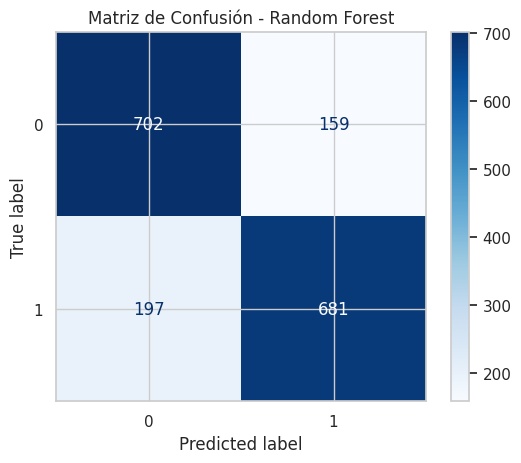

In [86]:
# Random Forest
metrics.append(evaluate_model_with_metrics(rf_model, X_val, y_val, "Random Forest"))

2. Resultados Logistic Regression

Reporte de Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       861
           1       0.77      0.82      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



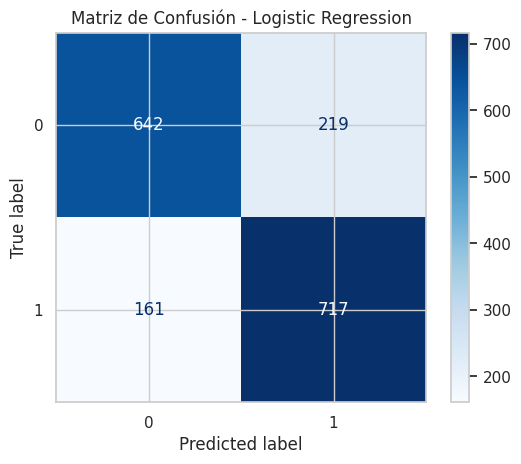

In [87]:
#Logistic Regression (descomentar si se usa)
metrics.append(evaluate_model_with_metrics(lr_model, X_val_scaled, y_val, "Logistic Regression"))

3. Resultados SVM

Reporte de Support Vector Machine:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       861
           1       0.79      0.80      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



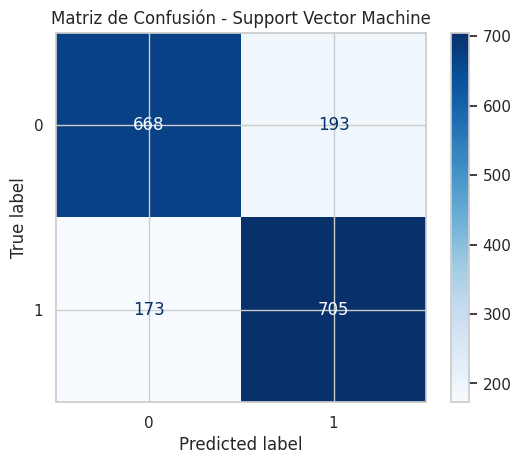

In [88]:
#Support Vector Machine (descomentar si se usa)
metrics.append(evaluate_model_with_metrics(svm_model, X_val_scaled, y_val, "Support Vector Machine"))


4. Resultados XGBoost

Reporte de XGBoost:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       861
           1       0.80      0.79      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



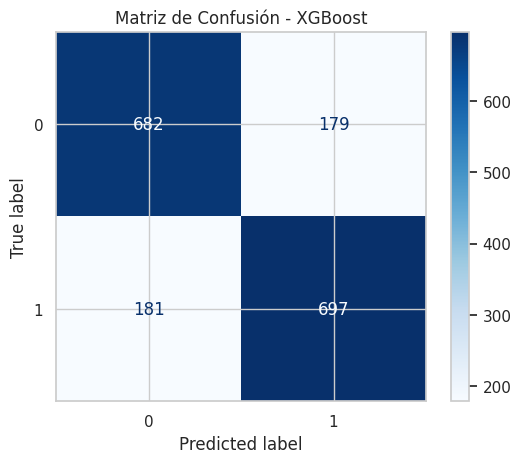

In [89]:
# XGBoost
metrics.append(evaluate_model_with_metrics(xgb_model, X_val, y_val, "XGBoost"))

5. Resultados Neural Network

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Reporte de Neural Network:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       861
           1       0.80      0.81      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



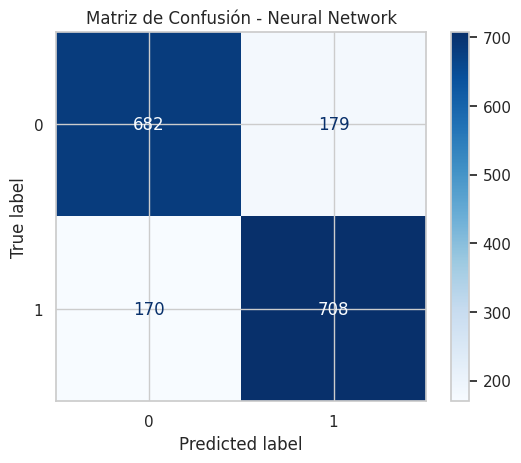

In [126]:
# Neural Network
metrics.append(evaluate_model_with_metrics(nn_model, X_val_scaled, y_val, "Neural Network", is_nn=True))

Resultados Comparativos

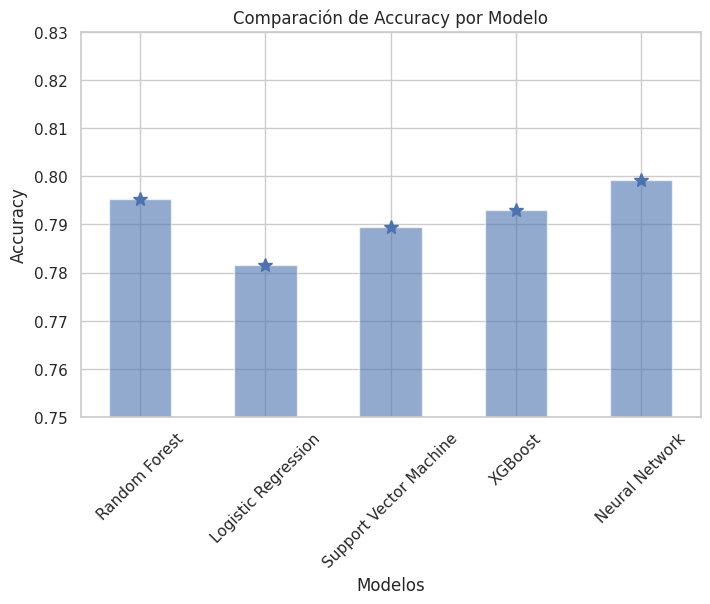

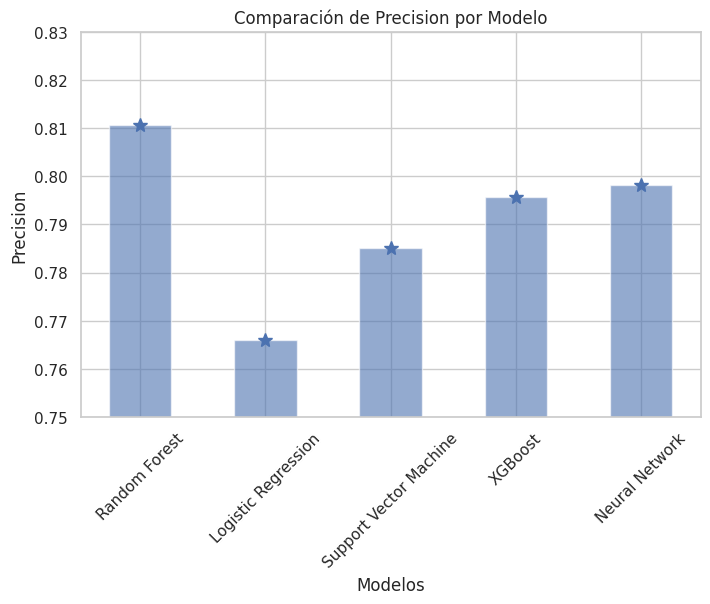

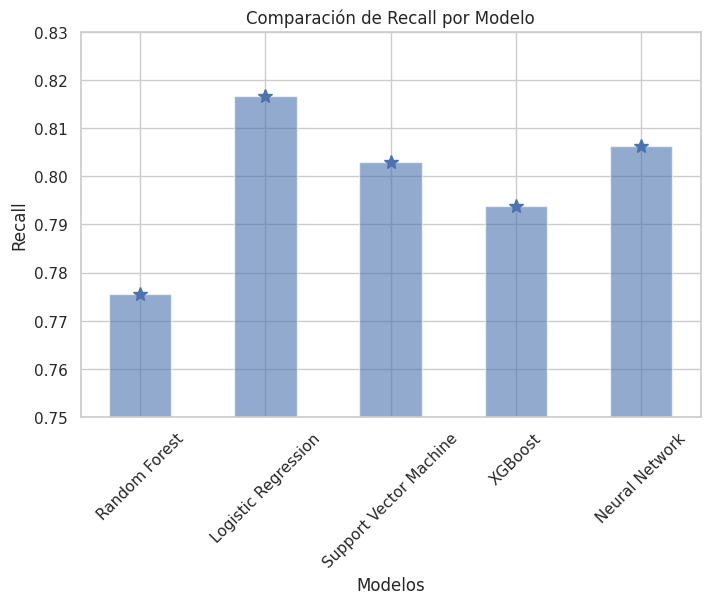

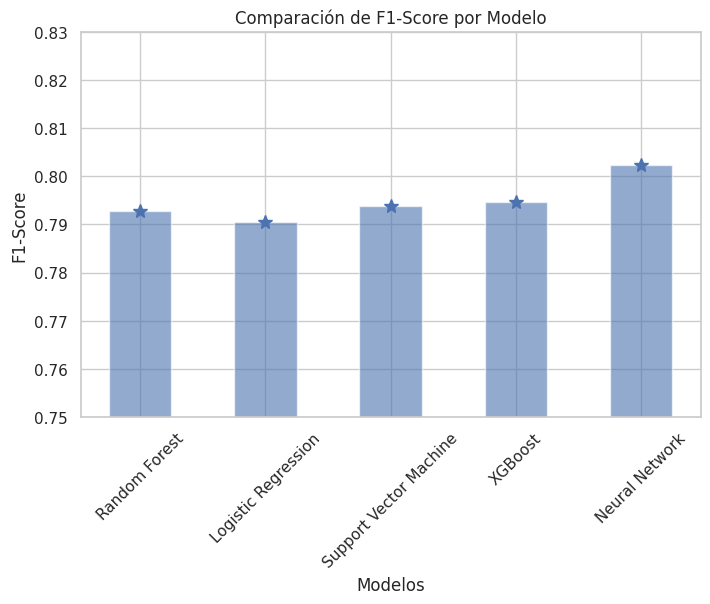


Tabla de métricas comparativas:
                    Model  Accuracy  Precision    Recall  F1-Score
0           Random Forest  0.795285   0.810714  0.775626  0.792782
1     Logistic Regression  0.781484   0.766026  0.816629  0.790518
2  Support Vector Machine  0.789534   0.785078  0.802961  0.793919
3                 XGBoost  0.792984   0.795662  0.793850  0.794755
4          Neural Network  0.799310   0.798196  0.806378  0.802266


In [127]:
# Convertir resultados a DataFrame para comparación
metrics_df = pd.DataFrame(metrics)

# Graficar métricas comparativas
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score"]
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 5))
    plt.plot(metrics_df["Model"], metrics_df[metric],linestyle='', marker='*', markersize=10)
    plt.bar(metrics_df["Model"], metrics_df[metric], alpha=0.6, width=0.5)
    plt.title(f"Comparación de {metric} por Modelo")
    plt.ylabel(metric)
    plt.xlabel("Modelos")
    plt.ylim(0.75, 0.83)  # Métricas entre 0 y 1
    plt.xticks(rotation=45)
    plt.show()

# Mostrar tabla de métricas
print("\nTabla de métricas comparativas:")
print(metrics_df)

## Descripción Resultados
**Resultados de los Modelos de Clasificación**

1.   Modelos Probados
 * Random Forest: Modelo basado en árboles de decisión que utiliza un conjunto de árboles para mejorar la precisión y evitar el sobreajuste.
 * Regresión Logística: Modelo lineal adecuado para clasificación binaria que calcula probabilidades utilizando una función sigmoide.
 * Support Vector Machine (SVM): Algoritmo que encuentra un hiperplano óptimo para separar las clases.
 * XGBoost: Modelo basado en boosting, especializado en optimización y velocidad para problemas complejos.
 * Red Neuronal: Modelo que utiliza múltiples capas de nodos conectados para aprender patrones complejos.

2.   Métricas Comparadas

 * Precisión (Precision): Indica cuántos de los resultados positivos predichos son correctos.
 * Sensibilidad (Recall): Mide la capacidad del modelo para identificar correctamente los positivos reales.
 * Puntaje F1 (F1-Score): Media armónica entre precisión y sensibilidad.
 * Exactitud (Accuracy): Proporción total de predicciones correctas.

3. Resultados

* Random Forest
 * Precisión (Precision): 0.78 para la clase 0 y 0.81 para la clase 1.
 * Sensibilidad (Recall): 0.82 para la clase 0 y 0.78 para la clase 1.
 * F1-Score: 0.80 para ambas clases.
 * Exactitud (Accuracy): 0.80.
 * Observación: Este modelo mostró un buen balance entre precisión y sensibilidad, destacándose ligeramente en la clase 0 (prediciendo correctamente pasajeros no transportados). Sin embargo, tuvo más falsos negativos (159) que falsos positivos (197).
* Regresión Logico
 * Precisión (Precision): 0.80 para la clase 0 y 0.77 para la clase 1.
 * Sensibilidad (Recall): 0.75 para la clase 0 y 0.82 para la clase 1.
 * F1-Score: 0.77 para la clase 0 y 0.79 para la clase 1.
 * Exactitud (Accuracy): 0.78.
 * Observación: Aunque este modelo tuvo una precisión ligeramente superior en la clase 0, su sensibilidad fue mejor para la clase 1, lo que significa que detectó con más éxito a los pasajeros transportados. Sin embargo, tuvo más falsos negativos en comparación con Random Forest.
* Support Vector Machine (SVM)
 * Precisión (Precision): 0.79 para ambas clases.
 * Sensibilidad (Recall): 0.78 para la clase 0 y 0.80 para la clase 1.
 * F1-Score: 0.78 para la clase 0 y 0.79 para la clase 1.
 * Exactitud (Accuracy): 0.79.
 * Observación: Este modelo mostró un desempeño equilibrado entre las dos clases. Su precisión y sensibilidad estuvieron cercanas en ambas clases, con resultados consistentes y sin grandes errores sistemáticos.
* XGBoost
 * Precisión (Precision): 0.79 para la clase 0 y 0.80 para la clase 1.
 * Sensibilidad (Recall): 0.79 para ambas clases.
 * F1-Score: 0.79 para ambas clases.
 * Exactitud (Accuracy): 0.79.
 * Observación: XGBoost fue uno de los modelos más consistentes en sus métricas. Aunque no sobresalió en ninguna métrica individual, su desempeño equilibrado lo hace adecuado para aplicaciones donde se necesita robustez.
* Red Neuronal
 * Precisión (Precision): 0.81 para la clase 0 y 0.79 para la clase 1.
 * Sensibilidad (Recall): 0.78 para la clase 0 y 0.82 para la clase 1.
 * F1-Score: 0.80 para ambas clases.
 * Exactitud (Accuracy): 0.80.
 * Observación: Este modelo tuvo el mejor rendimiento global en términos de precisión y sensibilidad combinadas. Detectó con mayor eficacia a los pasajeros transportados (clase 1), aunque todavía tuvo una cantidad significativa de falsos negativos (162).

* **Comparación General**
 * Mejor Modelo: Red Neuronal y Random Forest, debido a su alto F1-Score y exactitud general.
 * Modelo Más Consistente: SVM y XGBoost, ya que mantuvieron un equilibrio constante entre las métricas.
 * Modelo Más Interpretativo: Regresión Logística, por su simplicidad y facilidad para interpretar los resultados.

# **6 - Visualización Pesos por Variable**

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

# Función para graficar la importancia de variables
def plot_feature_importance(importances, feature_names, model_name):
    """
    Genera un gráfico de barras para la importancia de variables.
    """
    sorted_idx = np.argsort(importances)[::-1]  # Ordenar de mayor a menor
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x=importances[sorted_idx],
        y=np.array(feature_names)[sorted_idx],
        hue=None,
        palette="viridis",
        legend=False
    )
    plt.title(f"Importancia de Variables - {model_name}", fontsize=16)
    plt.xlabel("Importancia", fontsize=14)
    plt.ylabel("Características", fontsize=14)
    plt.tight_layout()
    plt.show()


<ipython-input-92-57a848839f47>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


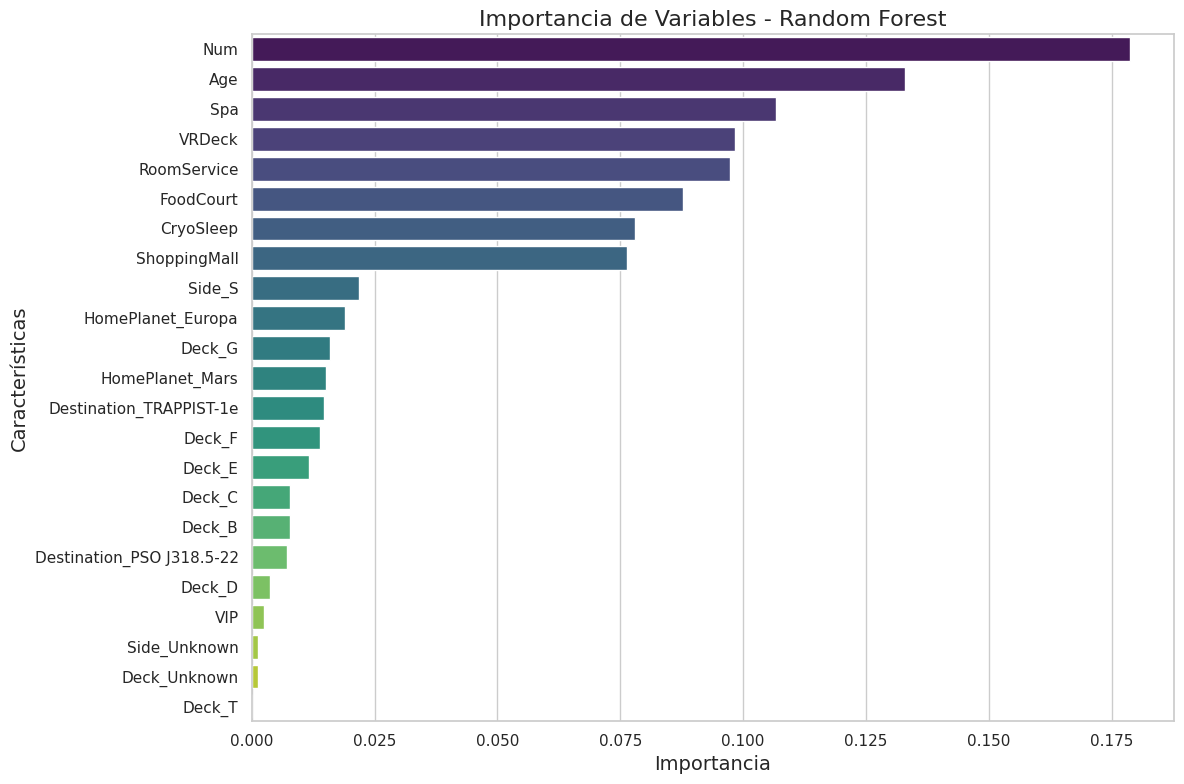

In [93]:
# 1. Importancia de variables en Random Forest
if hasattr(rf_model, 'feature_importances_'):
    rf_importances = rf_model.feature_importances_
    plot_feature_importance(rf_importances, X.columns, "Random Forest")

<ipython-input-92-57a848839f47>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


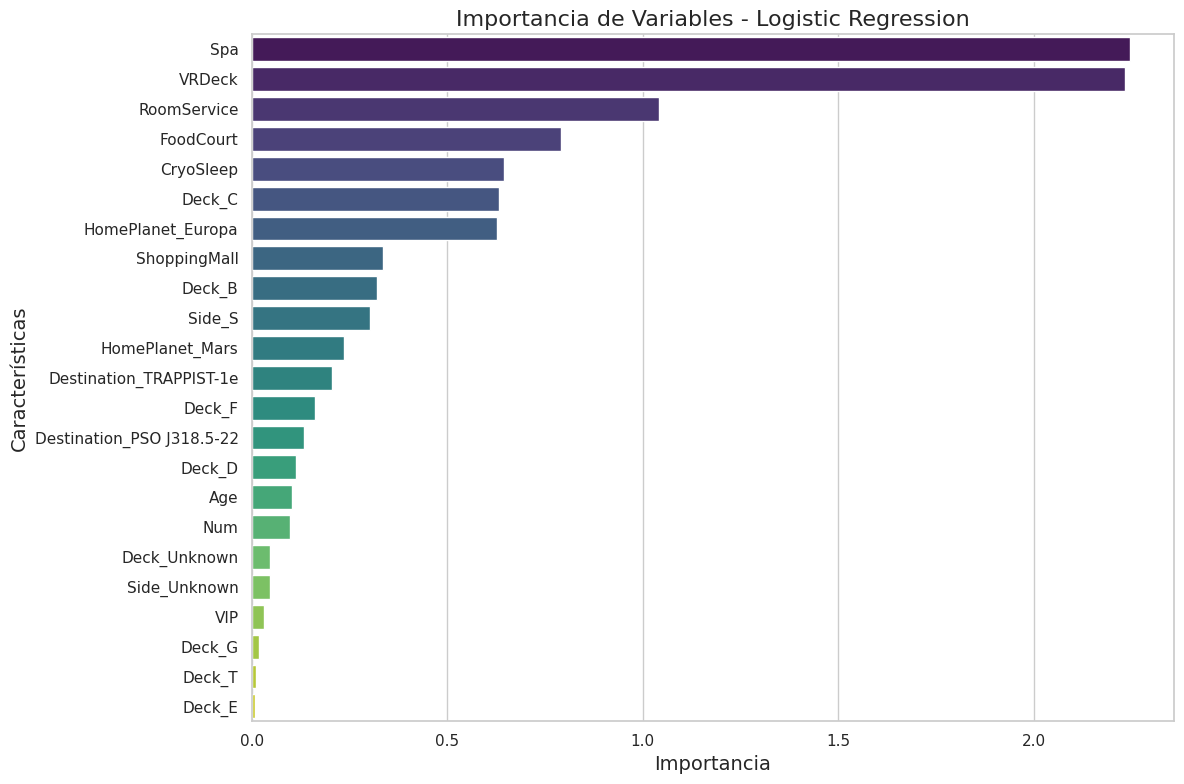

In [94]:
# 2. Importancia de variables en Logistic Regression
if hasattr(lr_model, 'coef_'):
    lr_importances = np.abs(lr_model.coef_[0])  # Magnitud de los coeficientes
    plot_feature_importance(lr_importances, X.columns, "Logistic Regression")

<ipython-input-92-57a848839f47>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


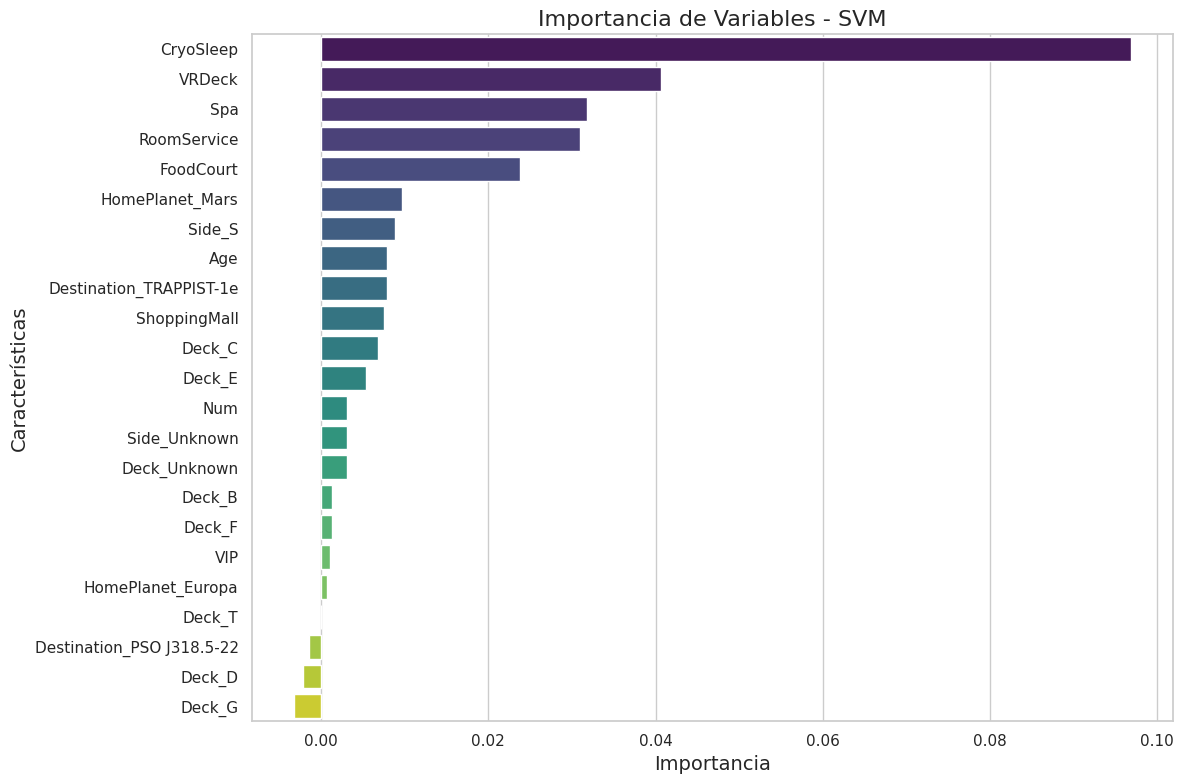

In [95]:
# 3. Importancia de variables en SVM (usando Permutation Importance)
svm_perm_importance = permutation_importance(
    svm_model, X_val_scaled, y_val, n_repeats=10, random_state=42, n_jobs=-1
)
plot_feature_importance(svm_perm_importance.importances_mean, X.columns, "SVM")

<ipython-input-92-57a848839f47>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


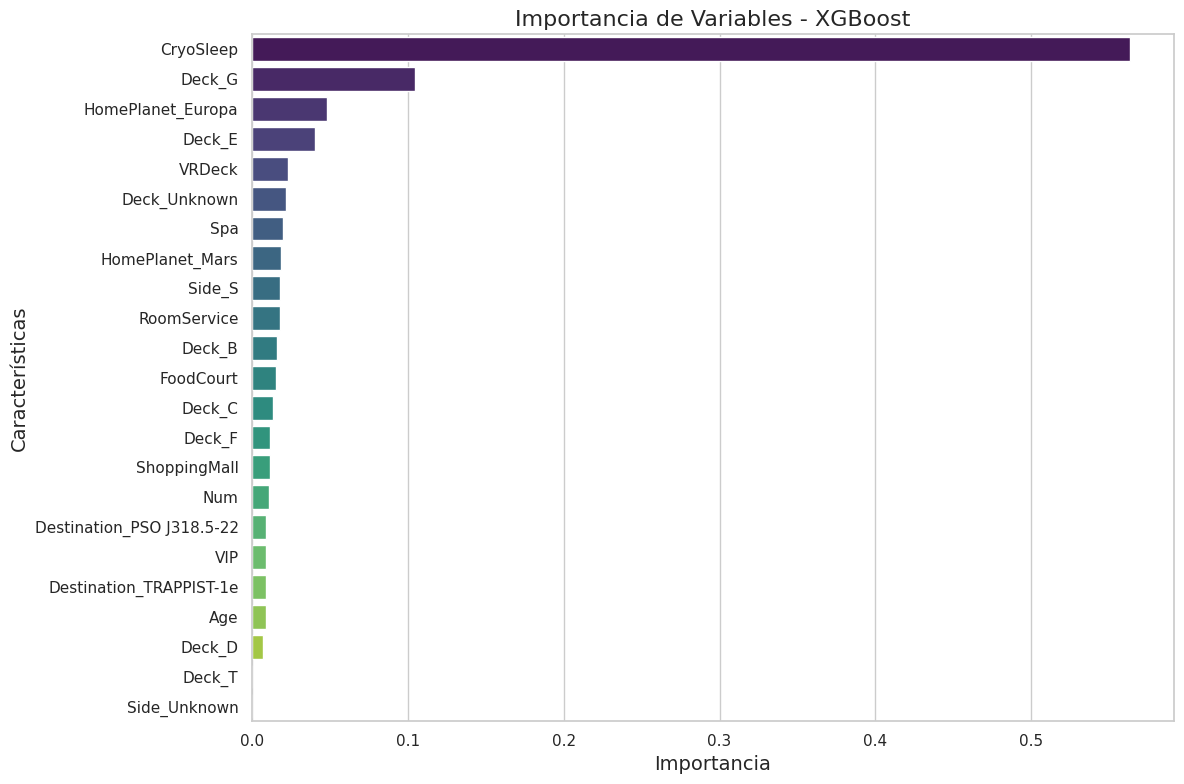

In [96]:
# 4. Importancia de variables en XGBoost
if hasattr(xgb_model, 'feature_importances_'):
    xgb_importances = xgb_model.feature_importances_
    plot_feature_importance(xgb_importances, X.columns, "XGBoost")

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━

<ipython-input-92-57a848839f47>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


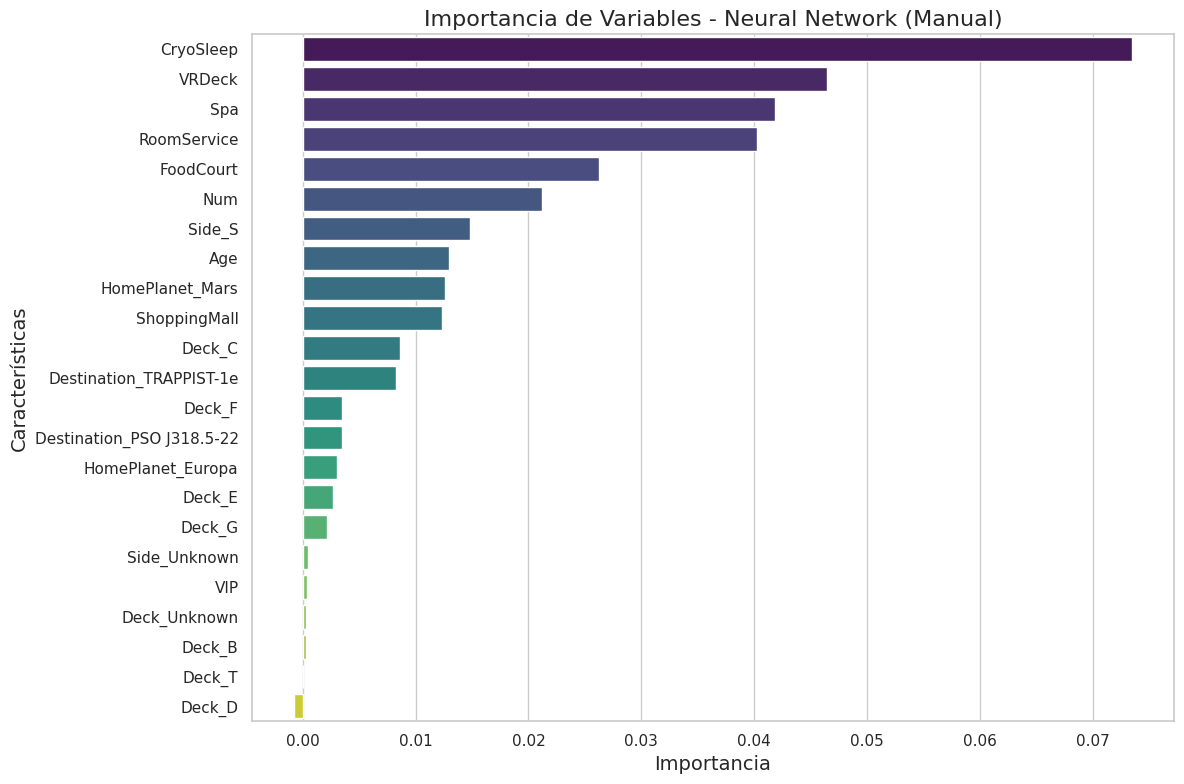

In [128]:
# 5. Importancia de variables en Redes Neuronales (usando Permutation Importance)
import numpy as np
from sklearn.metrics import accuracy_score

# Permutation Importance Manual para Redes Neuronales
def permutation_importance_manual(model, X, y, n_repeats=10):
    baseline_acc = accuracy_score(y, (model.predict(X) > 0.5).astype(int).ravel())
    importances = np.zeros(X.shape[1])

    for i in range(X.shape[1]):
        permuted_accs = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, i])  # Permutar la columna i
            permuted_acc = accuracy_score(y, (model.predict(X_permuted) > 0.5).astype(int).ravel())
            permuted_accs.append(baseline_acc - permuted_acc)
        importances[i] = np.mean(permuted_accs)
    return importances

# Calcular la importancia manualmente
nn_importances = permutation_importance_manual(nn_model, X_val_scaled, y_val, n_repeats=10)

# Graficar la importancia
plot_feature_importance(nn_importances, X.columns, "Neural Network (Manual)")



**¿Qué hace exactamente el código?**

1. **Cálculo de la métrica base:**
   - Calcula el rendimiento inicial del modelo (como la precisión en el conjunto de validación) sin alterar las características.

2. **Permutación de una característica:**
   - Una columna (característica) específica del conjunto de validación es permutada aleatoriamente, mientras que el resto de las características se mantiene igual. Esto elimina cualquier relación entre esa característica y la etiqueta objetivo (`y`).

3. **Evaluación del impacto:**
   - El modelo se evalúa nuevamente con la característica permutada. Si la métrica de rendimiento (por ejemplo, precisión) disminuye significativamente, indica que esa característica tiene una alta importancia para el modelo.

4. **Repetición:**
   - Este proceso se repite varias veces (`n_repeats`) para obtener una estimación más robusta de la importancia de cada característica.

5. **Resultados:**
   - La **importancia de una característica** es calculada como la **diferencia promedio en el rendimiento del modelo** entre el estado base y el estado con la característica permutada.

---

**¿Qué muestra realmente el código?**
El código genera un gráfico de barras que muestra cuánto depende el modelo de cada característica. Por ejemplo:

- Si permutar una característica reduce mucho la precisión, esa característica es importante para el modelo.
- Si permutar una característica no afecta la precisión, esa característica tiene poca o ninguna importancia para el modelo.

Este análisis es útil para:

- **Interpretar modelos complejos:** Entender qué variables son más relevantes para las predicciones.
- **Reducir dimensionalidad:** Identificar características irrelevantes que podrían eliminarse para simplificar el modelo.


# **000 - Evaluación en Dataset de Test**

## Carga datos de Test

In [98]:
# Cargar los datos originales
test_data = pd.read_csv('drive/MyDrive/NaveEspacialTitanic/test.csv')
display(test_data.head())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [99]:
# Estadística descriptiva general
print("Estadística descriptiva general:")
display(test_data.describe(include='all'))

Estadística descriptiva general:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,4277,4190,4184,4177,4185,4186.000000,4184,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4183
unique,4277,3,2,3265,3,NaN,2,NaN,NaN,NaN,NaN,NaN,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Cints Erle
freq,1,2263,2640,8,2956,NaN,4110,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,28.658146,NaN,219.266269,439.484296,177.295525,303.052443,310.710031,NaN
std,NaN,NaN,NaN,NaN,NaN,14.179072,NaN,607.011289,1527.663045,560.821123,1117.186015,1246.994742,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,53.000000,78.000000,33.000000,50.000000,36.000000,NaN


## Preprocesamiento datos de test

In [100]:
# Revisar valores faltantes
print("Valores faltantes por columna:")
print(test_data.isnull().sum())

Valores faltantes por columna:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [101]:
# Manejo de valores faltantes para columnas numéricas
test_data['Age'] = test_data['Age'].fillna(train_data['Age'].median())
test_data['RoomService'] = test_data['RoomService'].fillna(0)
test_data['FoodCourt'] = test_data['FoodCourt'].fillna(0)
test_data['ShoppingMall'] = test_data['ShoppingMall'].fillna(0)
test_data['Spa'] = test_data['Spa'].fillna(0)
test_data['VRDeck'] = test_data['VRDeck'].fillna(0)

# Manejo de valores faltantes para columnas categóricas
test_data['HomePlanet'] = test_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])
test_data['CryoSleep'] = test_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0])
test_data['Destination'] = test_data['Destination'].fillna(train_data['Destination'].mode()[0])
test_data['VIP'] = test_data['VIP'].fillna(train_data['VIP'].mode()[0])

# Manejo de valores faltantes para Cabin
if 'Cabin' in test_data.columns:
    test_data['Deck'] = test_data['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else 'Unknown')
    test_data['Num'] = test_data['Cabin'].apply(lambda x: int(x.split('/')[1]) if pd.notnull(x) else -1)
    test_data['Side'] = test_data['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else 'Unknown')
test_data.drop('Cabin', axis=1, inplace=True)  # Eliminar columna original Cabin


display(test_data.head())

<ipython-input-101-1df19ddbb2f9>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['CryoSleep'] = test_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0])
<ipython-input-101-1df19ddbb2f9>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['VIP'] = test_data['VIP'].fillna(train_data['VIP'].mode()[0])


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [102]:
# Manejo de valores faltantes para Name
if 'Name' in test_data.columns:
    test_data['Surname'] = test_data['Name'].apply(lambda x: x.split()[1] if pd.notnull(x) else 'Unknown')
    test_data.drop('Name', axis=1, inplace=True)  # Eliminar columna original Name

In [103]:
# Comprobar si aún quedan valores faltantes
print("\nValores faltantes después de la imputación:")
print(test_data.isnull().sum())

# Guardar los datos preprocesados en la misma carpeta de Google Drive
test_data.to_csv('drive/MyDrive/NaveEspacialTitanic/test_preprocessed.csv', index=False)

print("\nPreprocesamiento inicial completado. Los datos preprocesados se guardaron como 'test_preprocessed.csv' en Google Drive.")



Valores faltantes después de la imputación:
PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Num             0
Side            0
Surname         0
dtype: int64

Preprocesamiento inicial completado. Los datos preprocesados se guardaron como 'test_preprocessed.csv' en Google Drive.


In [104]:
from sklearn.preprocessing import LabelEncoder

# Copiar dataset para trabajar
encoded_data = test_data.copy()

# Codificar `HomePlanet`, `Destination` y `Deck` usando One-Hot Encoding
one_hot_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']
encoded_data = pd.get_dummies(encoded_data, columns=one_hot_cols, drop_first=True)

# Codificar `CryoSleep` y `VIP` usando Binary Encoding
binary_cols = ['CryoSleep', 'VIP']
for col in binary_cols:
    encoded_data[col] = encoded_data[col].map({False: 0, True: 1})

# Revisar datos codificados
display(encoded_data.head())

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,Side_S,Side_Unknown
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3,...,False,False,False,False,False,True,False,False,True,False
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4,...,False,False,False,False,True,False,False,False,True,False
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,...,False,True,False,False,False,False,False,False,True,False
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,...,False,True,False,False,False,False,False,False,True,False
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5,...,False,False,False,False,True,False,False,False,True,False


## **Predicción en modelos no optimizados**

In [105]:
# Asegúrate de que el conjunto de test está cargado y preprocesado en un DataFrame llamado 'data_test'
data_test = encoded_data.copy()

# Eliminar columnas no relevantes (incluyendo 'Transported', si está presente)
X_test = data_test.drop(['PassengerId', 'Surname', 'Transported'], axis=1, errors='ignore')  # Remover Transported si existe

# Escalar si es necesario (para SVM, Logistic Regression y Neural Networks)
X_test_scaled = scaler.transform(X_test)  # Escalar solo si los modelos requieren datos escalados

In [162]:
# Crear un diccionario para almacenar predicciones de cada modelo
test_predictions_no_op = {}

# Predicción con Random Forest
test_predictions_no_op["Random Forest"] = rf_model.predict(X_test)

# Predicción con XGBoost
test_predictions_no_op["XGBoost"] = xgb_model.predict(X_test)

# Predicción con Logistic Regression (descomentar si se usa)
test_predictions_no_op["Logistic Regression"] = lr_model.predict(X_test_scaled)

# Predicción con SVM (descomentar si se usa)
test_predictions_no_op["Support Vector Machine"] = svm_model.predict(X_test_scaled)

# Predicción con Neural Network
test_predictions_no_op["Neural Network"] = (nn_model.predict(X_test_scaled) > 0.5).astype(int).flatten()


# Crear DataFrame final con PassengerId y predicciones
test_predictions_df_no_op = data_test[['PassengerId']].copy()  # Asegurar que PassengerId esté presente
for model_name, predictions in test_predictions_no_op.items():
    test_predictions_df_no_op[model_name] = predictions  # Agregar predicciones de cada modelo

# Guardar predicciones en un archivo CSV
test_predictions_df_no_op.to_csv("test_predictions_with_ids_no_op.csv", index=False)
print("\nLas predicciones con los IDs de pasajeros se han guardado en el archivo 'test_predictions_with_ids_no_op.csv'.")

# Vista previa del DataFrame resultante
print("\nDataFrame final:")
display(test_predictions_df_no_op.head())

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Las predicciones con los IDs de pasajeros se han guardado en el archivo 'test_predictions_with_ids_no_op.csv'.

DataFrame final:


,PassengerId,Random Forest,XGBoost,Logistic Regression,Support Vector Machine,Neural Network
0,0013_01,1,1,1,1,0
1,0018_01,0,0,0,0,0
2,0019_01,1,1,1,1,1
3,0021_01,1,1,1,1,1
4,0023_01,1,1,1,0,0


In [163]:
# Crear un diccionario para almacenar predicciones de cada modelo
test_predictions_no_op = {}

# Predicción con Random Forest
test_predictions_no_op["Random Forest"] = rf_model.predict(X_test)

# Predicción con XGBoost
test_predictions_no_op["XGBoost"] = xgb_model.predict(X_test)

# Predicción con Logistic Regression
test_predictions_no_op["Logistic Regression"] = lr_model.predict(X_test_scaled)

# Predicción con SVM
test_predictions_no_op["Support Vector Machine"] = svm_model.predict(X_test_scaled)

# Predicción con Neural Network
test_predictions_no_op["Neural Network"] = (nn_model.predict(X_test_scaled) > 0.5).astype(int).flatten()

# Generar un archivo CSV para cada modelo
for model_name, predictions in test_predictions_no_op.items():
    # Crear un DataFrame con PassengerId y las predicciones del modelo
    model_predictions_df = data_test[['PassengerId']].copy()

    # Convertir las predicciones a True/False
    model_predictions_df["Transported"] = predictions.astype(bool)

    # Guardar el DataFrame en un archivo CSV
    file_name = f"{model_name.replace(' ', '_')}_predictions.csv"
    model_predictions_df.to_csv(file_name, index=False)
    print(f"\nLas predicciones para el modelo '{model_name}' se han guardado en el archivo '{file_name}'.")

# Vista previa de un archivo (opcional)
model_name_example = "Random Forest"
print(f"\nVista previa de las predicciones para '{model_name_example}':")
display(data_test[['PassengerId']].assign(Transported=test_predictions_no_op[model_name_example].astype(bool)).head())


134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Las predicciones para el modelo 'Random Forest' se han guardado en el archivo 'Random_Forest_predictions.csv'.

Las predicciones para el modelo 'XGBoost' se han guardado en el archivo 'XGBoost_predictions.csv'.

Las predicciones para el modelo 'Logistic Regression' se han guardado en el archivo 'Logistic_Regression_predictions.csv'.

Las predicciones para el modelo 'Support Vector Machine' se han guardado en el archivo 'Support_Vector_Machine_predictions.csv'.

Las predicciones para el modelo 'Neural Network' se han guardado en el archivo 'Neural_Network_predictions.csv'.

Vista previa de las predicciones para 'Random Forest':


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


# **7 - Optimización Modelos**

In [110]:
# Instalar scikeras si no está instalado
!pip install scikeras

# Verificar instalación
import scikeras
print("scikeras instalado correctamente.")


scikeras instalado correctamente.


In [111]:
import numpy as np
import time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
!pip install scikeras



# Función para optimizar y entrenar un modelo
def optimize_model(model, param_grid, X_train, y_train, cv=3, scoring='accuracy', random_search=False, n_iter=50):
    """
    Optimiza los hiperparámetros de un modelo utilizando GridSearchCV o RandomizedSearchCV.
    """
    start_time = time.time()  # Inicia el cronómetro
    search = (
        RandomizedSearchCV(
            model,
            param_distributions=param_grid,
            n_iter=n_iter,
            cv=cv,
            scoring=scoring,
            random_state=42,
            n_jobs=-1,
            verbose=1,
        )
        if random_search
        else GridSearchCV(
            model,
            param_grid=param_grid,
            cv=cv,
            scoring=scoring,
            n_jobs=-1,
            verbose=1,
        )
    )
    search.fit(X_train, y_train)
    elapsed_time = time.time() - start_time  # Tiempo transcurrido
    print(f"\n[Tiempo] Optimización completada en {elapsed_time:.2f} segundos.")
    print(f"Mejores hiperparámetros: {search.best_params_}")
    print(f"Mejor precisión en validación: {search.best_score_:.4f}")
    return search.best_estimator_

1. Optimización Random Forest

In [112]:
# Inicio del marcador de tiempo general
general_start_time = time.time()

# 1. Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
optimized_rf_model = optimize_model(RandomForestClassifier(random_state=42), rf_param_grid, X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits

[Tiempo] Optimización completada en 419.78 segundos.
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Mejor precisión en validación: 0.8085


2. Optimización Logistic Regression

In [ ]:
# 2. Logistic Regression (descomentar si se usa)
#lr_param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'solver': ['saga', 'lbfgs'],
# }
# optimized_lr_model = optimize_model(LogisticRegression(max_iter=1000, random_state=42), lr_param_grid, X_train_scaled, y_train)

3. Optimización SVM

In [ ]:
# 3. Support Vector Machine (SVM) (descomentar si se usa)
#svm_param_grid = {
#    'C': [0.1, 1, 10, 100],
#    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
#}
#optimized_svm_model = optimize_model(SVC(random_state=42), svm_param_grid, X_train_scaled, y_train)

4. Optimización XGBoost

In [ ]:
# 4. XGBoost
#xgb_param_grid = {
#    'n_estimators': [100, 200, 300],
#    'learning_rate': [0.01, 0.1, 0.2, 0.3],
#    'max_depth': [3, 5, 7, 10],
#    'subsample': [0.7, 0.8, 0.9, 1.0],
#    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
#}
#optimized_xgb_model = optimize_model(XGBClassifier(random_state=42, eval_metric='logloss'), xgb_param_grid, X_train, y_train)

5. Optimización Neural Network

In [113]:
# 5. Neural Network
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV

# Crear modelo como función para KerasClassifier
def build_nn(optimizer='adam', dropout_rate=0.4, activation='relu', neurons=64):
    model = Sequential([
        Dense(neurons, activation=activation, input_shape=(X_train_scaled.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons, activation=activation),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hiperparámetros de la red neuronal
nn_param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'model__neurons': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100, 200, 300],
}

# Envolver modelo en KerasClassifier
nn_model = KerasClassifier(
    model=build_nn,
    verbose=0,
)

# Optimización de la red neuronal con conjunto de validación fijo
random_search = RandomizedSearchCV(
    estimator=nn_model,
    param_distributions=nn_param_grid,
    n_iter=10,  # Limitar el número de combinaciones probadas
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Ajustar modelo con conjunto de validación fijo
random_search.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val))

# Mostrar los mejores parámetros
print("Mejores hiperparámetros:")
print(random_search.best_params_)

# Evaluar el modelo optimizado en el conjunto de validación
best_nn_model = random_search.best_estimator_
val_accuracy = best_nn_model.score(X_val_scaled, y_val)
print(f"Precisión en el conjunto de validación: {val_accuracy:.4f}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mejores hiperparámetros:
{'model__optimizer': 'adam', 'model__neurons': 32, 'model__dropout_rate': 0.2, 'epochs': 100, 'batch_size': 16}
Precisión en el conjunto de validación: 0.7913


## Visualización Resultados Modelos Optimizados

In [164]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Evaluar modelos y recolectar métricas
def evaluate_model_with_metrics(model, X_val, y_val, model_name, is_nn=False):
    """
    Evalúa un modelo en el conjunto de validación y genera métricas como accuracy, recall, precision y f1-score.
    """
    if is_nn:
        preds = (model.predict(X_val) > 0.5).astype(int).flatten()  # Red Neuronal
    else:
        preds = model.predict(X_val)  # Otros modelos
        if hasattr(model, "predict_proba"):  # Si devuelve probabilidades
            preds = (preds > 0.5).astype(int)

    # Generar reporte de clasificación
    report = classification_report(y_val, preds, output_dict=True)
    print(f"Reporte de {model_name}:\n", classification_report(y_val, preds))

    # Mostrar matriz de confusión
    cm = confusion_matrix(y_val, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()

    # Devolver las métricas importantes
    return {
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],  # Clase positiva
        "Recall": report["1"]["recall"],        # Clase positiva
        "F1-Score": report["1"]["f1-score"]     # Clase positiva
    }

Reporte de Optimized Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79       861
           1       0.79      0.81      0.80       878

    accuracy                           0.79      1739
   macro avg       0.80      0.79      0.79      1739
weighted avg       0.80      0.79      0.79      1739



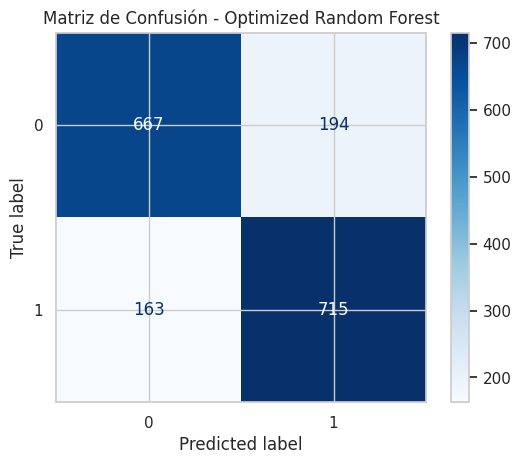

Reporte de Optimized Neural Network:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       861
           1       0.80      0.79      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



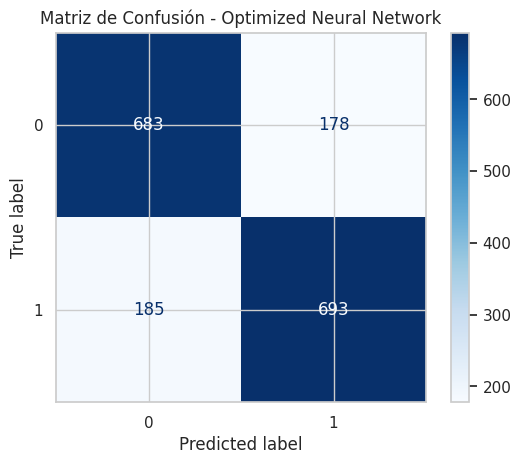

In [165]:
# Random Forest
metrics.append(evaluate_model_with_metrics(optimized_rf_model, X_val, y_val, "Optimized Random Forest"))

# #Logistic Regression (descomentar si se usa)
#metrics.append(evaluate_model_with_metrics(optimized_lr_model, X_val_scaled, y_val, "Logistic Regression"))

#Support Vector Machine (descomentar si se usa)
#metrics.append(evaluate_model_with_metrics(optimized_svm_model, X_val_scaled, y_val, "Support Vector Machine"))

# XGBoost
#metrics.append(evaluate_model_with_metrics(optimized_xgb_model, X_val, y_val, "XGBoost"))

# Neural Network
optimized_nn_model = best_nn_model  # Usar el modelo optimizado
metrics.append(evaluate_model_with_metrics(optimized_nn_model,  X_val_scaled, y_val, "Optimized Neural Network", is_nn=True))


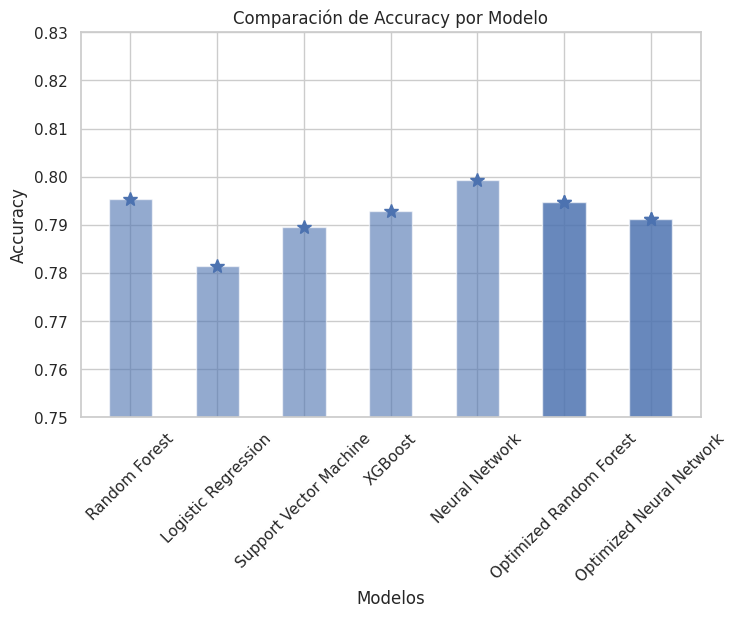

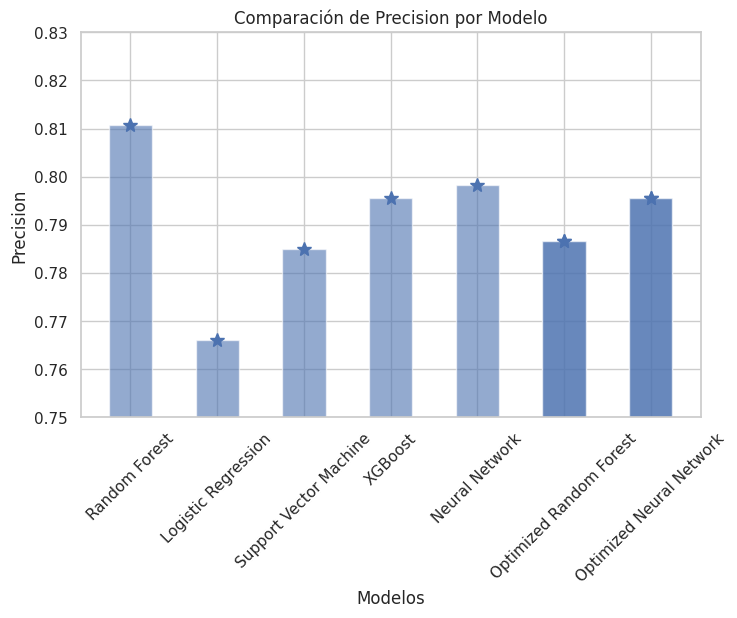

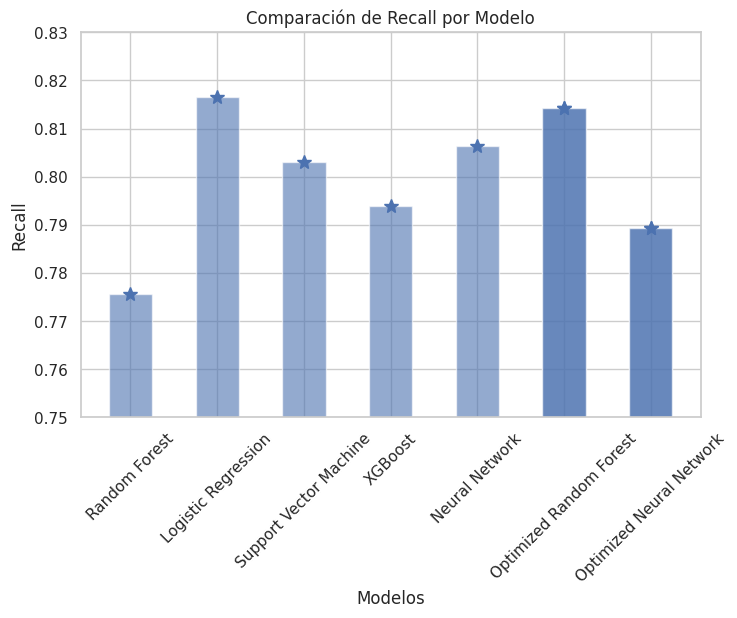

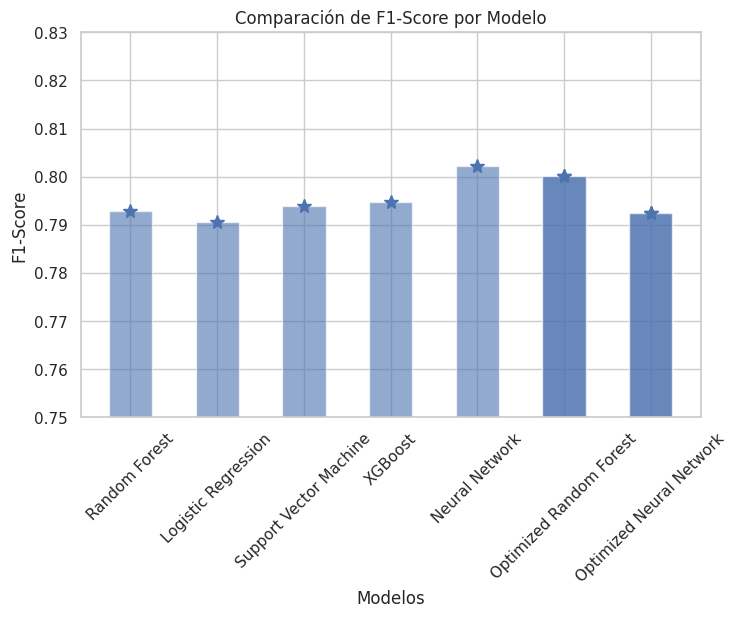


Tabla de métricas comparativas:
                      Model  Accuracy  Precision    Recall  F1-Score
0             Random Forest  0.795285   0.810714  0.775626  0.792782
1       Logistic Regression  0.781484   0.766026  0.816629  0.790518
2    Support Vector Machine  0.789534   0.785078  0.802961  0.793919
3                   XGBoost  0.792984   0.795662  0.793850  0.794755
4            Neural Network  0.799310   0.798196  0.806378  0.802266
5   Optimized Random Forest  0.794710   0.786579  0.814351  0.800224
6  Optimized Neural Network  0.791259   0.795637  0.789294  0.792453
7   Optimized Random Forest  0.794710   0.786579  0.814351  0.800224
8  Optimized Neural Network  0.791259   0.795637  0.789294  0.792453


In [166]:
# Convertir resultados a DataFrame para comparación
metrics_df = pd.DataFrame(metrics)

# Graficar métricas comparativas
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score"]
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 5))
    plt.plot(metrics_df["Model"], metrics_df[metric],linestyle='', marker='*', markersize=10)
    plt.bar(metrics_df["Model"], metrics_df[metric], alpha=0.6, width=0.5)
    plt.title(f"Comparación de {metric} por Modelo")
    plt.ylabel(metric)
    plt.xlabel("Modelos")
    plt.ylim(0.75, 0.83)  # Métricas entre 0 y 1
    plt.xticks(rotation=45)
    plt.show()

# Mostrar tabla de métricas
print("\nTabla de métricas comparativas:")
print(metrics_df)

## Visualización Importancia Variables Modelos Optimizados

<ipython-input-92-57a848839f47>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


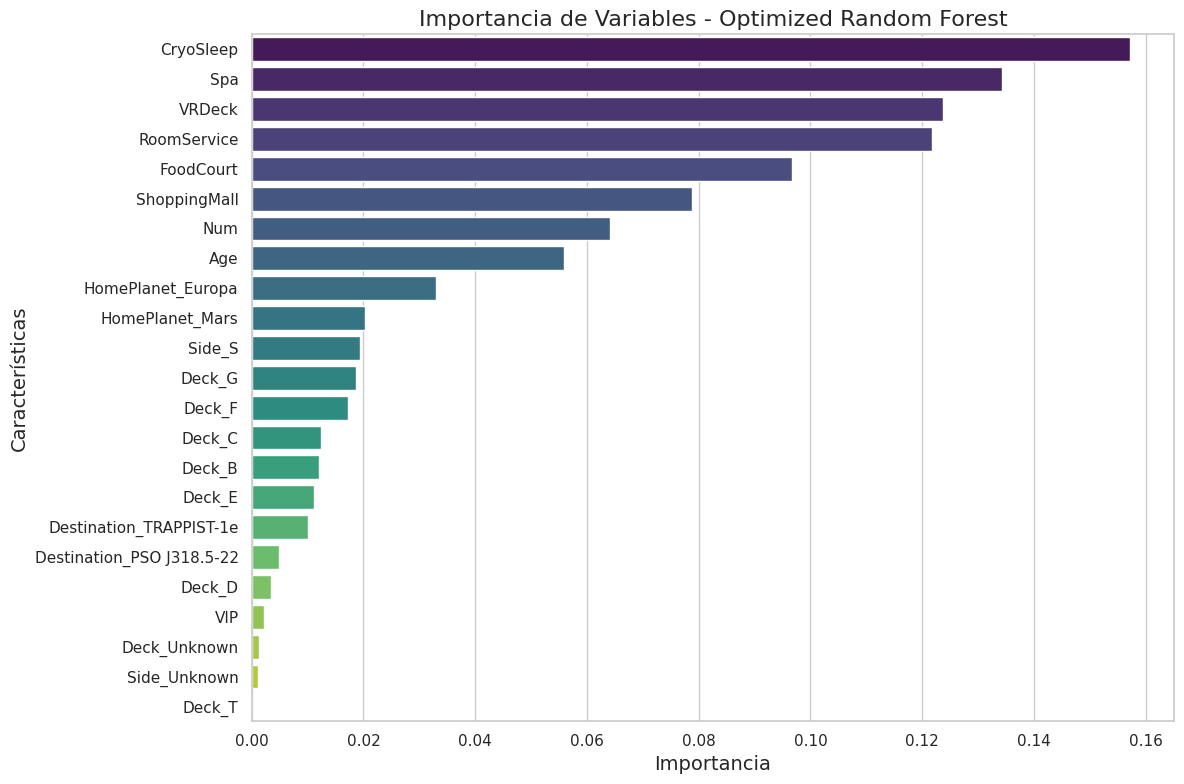

In [167]:
# 1. Importancia de variables en Optimized Random Forest
if hasattr(optimized_rf_model, 'feature_importances_'):
    rf_importances = optimized_rf_model.feature_importances_
    plot_feature_importance(rf_importances, X.columns, "Optimized Random Forest")

<ipython-input-92-57a848839f47>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


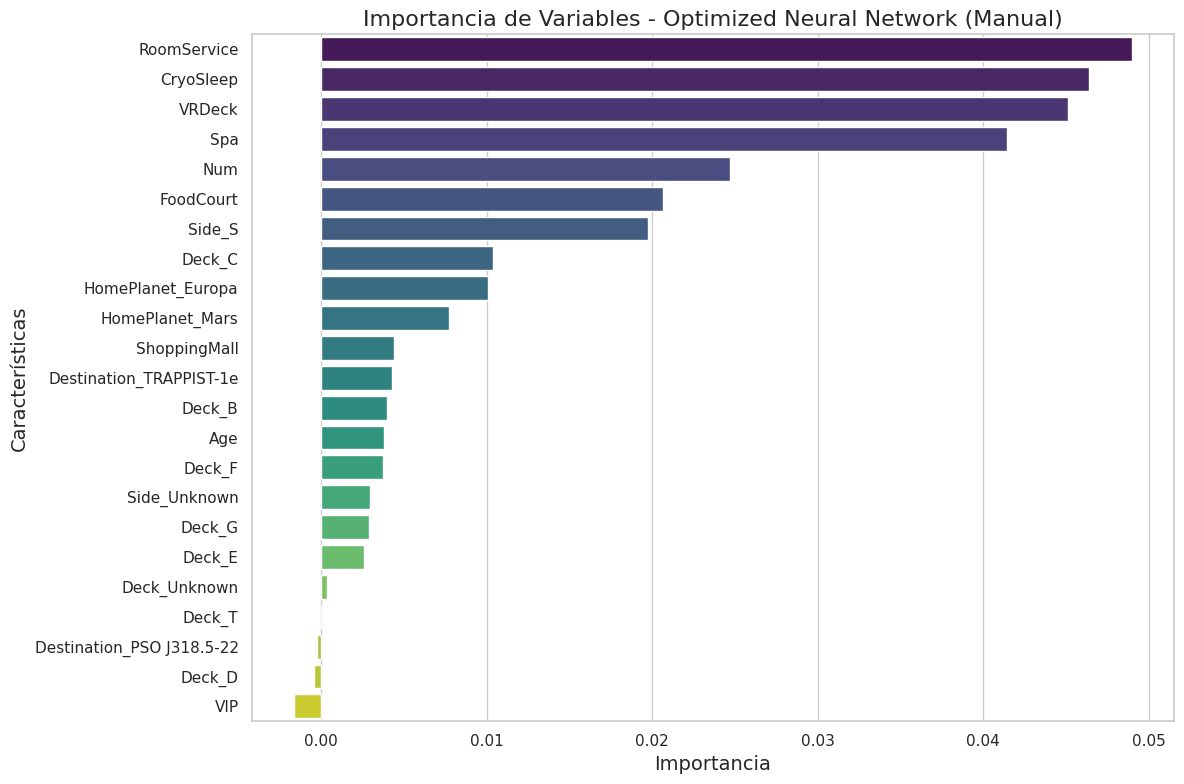

In [168]:
# 5. Importancia de variables en Optimized Redes Neuronales (usando Permutation Importance)
import numpy as np
from sklearn.metrics import accuracy_score

# Permutation Importance Manual para Redes Neuronales
def permutation_importance_manual(model, X, y, n_repeats=10):
    baseline_acc = accuracy_score(y, (model.predict(X) > 0.5).astype(int).ravel())
    importances = np.zeros(X.shape[1])

    for i in range(X.shape[1]):
        permuted_accs = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, i])  # Permutar la columna i
            permuted_acc = accuracy_score(y, (model.predict(X_permuted) > 0.5).astype(int).ravel())
            permuted_accs.append(baseline_acc - permuted_acc)
        importances[i] = np.mean(permuted_accs)
    return importances

# Calcular la importancia manualmente
nn_importances_opt = permutation_importance_manual(best_nn_model, X_val_scaled, y_val, n_repeats=10)

# Graficar la importancia
plot_feature_importance(nn_importances_opt, X.columns, "Optimized Neural Network (Manual)")


# **000 - Evaluación en Data Test**

## **Predicción en modelos optimizados**

In [169]:
# Asegúrate de que el conjunto de test está cargado y preprocesado en un DataFrame llamado 'data_test'
data_test = encoded_data.copy()

# Eliminar columnas no relevantes (incluyendo 'Transported', si está presente)
X_test = data_test.drop(['PassengerId', 'Surname', 'Transported'], axis=1, errors='ignore')  # Remover Transported si existe

# Escalar si es necesario (para SVM, Logistic Regression y Neural Networks)
X_test_scaled = scaler.transform(X_test)  # Escalar solo si los modelos requieren datos escalados

In [170]:
# Crear un diccionario para almacenar predicciones de cada modelo
test_predictions_op = {}

# Predicción con Random Forest
test_predictions_op["Random Forest Optimizado"] = optimized_rf_model.predict(X_test)

# Predicción con XGBoost
#test_predictions_op["XGBoost Optimizado"] = xgb_model.predict(X_test)

# Predicción con Logistic Regression (descomentar si se usa)
#test_predictions_op["Logistic Regression Optimizado"] = lr_model.predict(X_test_scaled)

# Predicción con SVM (descomentar si se usa)
#test_predictions_op["Support Vector Machine Optimizado"] = svm_model.predict(X_test_scaled)

# Predicción con Neural Network
test_predictions_op["Neural Network Optimizado"] = (best_nn_model.predict(X_test_scaled) > 0.5).astype(int).flatten()


# Crear DataFrame final con PassengerId y predicciones
test_predictions_df_op = data_test[['PassengerId']].copy()  # Asegurar que PassengerId esté presente
for model_name, predictions in test_predictions_op.items():
    test_predictions_df_op[model_name] = predictions  # Agregar predicciones de cada modelo

# Guardar predicciones en un archivo CSV
test_predictions_df_op.to_csv("test_predictions_with_ids_no_op.csv", index=False)
print("\nLas predicciones con los IDs de pasajeros se han guardado en el archivo 'test_predictions_with_ids_op.csv'.")

# Vista previa del DataFrame resultante
print("\nDataFrame final:")
display(test_predictions_df_op.head())


Las predicciones con los IDs de pasajeros se han guardado en el archivo 'test_predictions_with_ids_op.csv'.

DataFrame final:


,PassengerId,Random Forest Optimizado,Neural Network Optimizado
0,0013_01,1,0
1,0018_01,0,0
2,0019_01,1,1
3,0021_01,1,1
4,0023_01,1,0


In [171]:
# Crear un diccionario para almacenar predicciones de cada modelo
test_predictions_op = {}

# Predicción con Random Forest
test_predictions_op["Random Forest Optimizado"] = optimized_rf_model.predict(X_test)

# Predicción con XGBoost
#test_predictions_op["XGBoost Optimizado"] = xgb_model.predict(X_test)

# Predicción con Logistic Regression
#test_predictions_op["Logistic Regression Optimizado"] = lr_model.predict(X_test_scaled)

# Predicción con SVM
#test_predictions_op["Support Vector Machine Optimizado"] = svm_model.predict(X_test_scaled)

# Predicción con Neural Network
test_predictions_op["Neural Network Optimizado"] = (best_nn_model.predict(X_test_scaled) > 0.5).astype(int).flatten()

# Generar un archivo CSV para cada modelo
for model_name, predictions in test_predictions_op.items():
    # Crear un DataFrame con PassengerId y las predicciones del modelo
    model_predictions_df = data_test[['PassengerId']].copy()

    # Convertir las predicciones a True/False
    model_predictions_df["Transported"] = predictions.astype(bool)

    # Guardar el DataFrame en un archivo CSV
    file_name = f"{model_name.replace(' ', '_')}_predictions.csv"
    model_predictions_df.to_csv(file_name, index=False)
    print(f"\nLas predicciones para el modelo '{model_name}' se han guardado en el archivo '{file_name}'.")

# Vista previa de un archivo (opcional)
#model_name_example = "Random Forest"
#print(f"\nVista previa de las predicciones para '{model_name_example}':")
#display(data_test[['PassengerId']].assign(Transported=test_predictions_op[model_name_example].astype(bool)).head())


Las predicciones para el modelo 'Random Forest Optimizado' se han guardado en el archivo 'Random_Forest_Optimizado_predictions.csv'.

Las predicciones para el modelo 'Neural Network Optimizado' se han guardado en el archivo 'Neural_Network_Optimizado_predictions.csv'.
